In [1]:
import pandas as pd

df_flood_fill = pd.read_csv('results/csv_files/competition/final/flood_fill.csv')
df_bfs = pd.read_csv('results/csv_files/competition/final/bfs.csv')
df_astar = pd.read_csv('results/csv_files/competition/final/astar.csv')
df_dijkstra = pd.read_csv('results/csv_files/competition/final/dijkstra.csv')
df_sarsa = pd.read_csv('results/csv_files/competition/final/sarsa_using_arbitrary.csv')
df_qlearning = pd.read_csv('results/csv_files/competition/final/qlearning_using_arbitrary.csv')
df_dyna_qlearning_arbt = pd.read_csv('results/csv_files/competition/final/dyna_qlearning_using_arbitrary.csv')
df_dyna_qlearning_time = pd.read_csv('results/csv_files/competition/final/dyna_qlearning_using_time.csv')
dynaq_sarsa_arbt = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_arbitrary.csv')
dynaq_sarsa_time = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_time.csv')

df_dynaq_sarsa_arbt = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_arbitrary.csv')
df_dynaq_sarsa_time = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_time.csv')

df_flood_fill_time = pd.read_csv('results/csv_files/competition/final/flood_fill_time.csv')
df_bfs_time = pd.read_csv('results/csv_files/competition/final/bfs_time.csv')

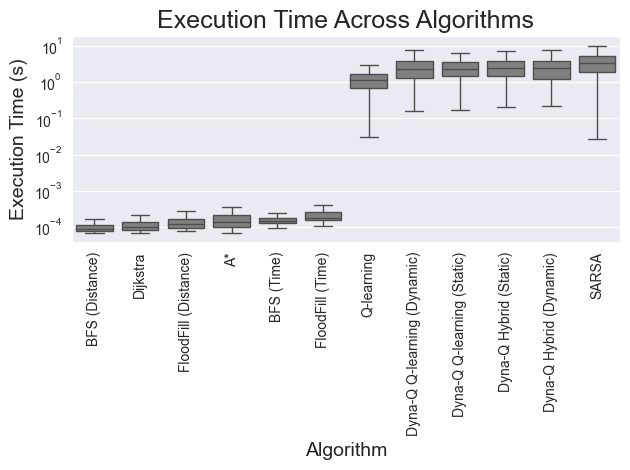

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Define the list of DataFrames and their corresponding algorithm names
dfs = [
    ('FloodFill (Distance)', df_flood_fill),
    ('BFS (Distance)', df_bfs),
    ('A*', df_astar),
    ('Dijkstra', df_dijkstra),
    ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('Dyna-Q Q-learning (Static)', df_dyna_qlearning_arbt),
    ('Dyna-Q Q-learning (Dynamic)', df_dyna_qlearning_time),
    ('Dyna-Q Hybrid (Static)', dynaq_sarsa_arbt),
    ('Dyna-Q Hybrid (Dynamic)', dynaq_sarsa_time),
    ('FloodFill (Time)', df_flood_fill_time),
    ('BFS (Time)', df_bfs_time)
]

# Create a list of DataFrames with an additional 'Algorithm' column
df_list = []
for name, df in dfs:
    df_copy = df.copy()  # Ensure we don't modify the original DataFrame
    df_copy['Algorithm'] = name
    df_list.append(df_copy)

# Combine all DataFrames
df_combined_RL = pd.concat(df_list, ignore_index=True)

# Convert Execution Time from microseconds to seconds
df_combined_RL['Execution Time (secs)'] = df_combined_RL['Execution Time (micro secs)'] * pow(10, -6)

# Calculate median execution time for sorting
median_execution_time = df_combined_RL.groupby('Algorithm')['Execution Time (secs)'].median().sort_values()

# Sort the DataFrame based on the median execution time
df_combined_RL['Algorithm'] = pd.Categorical(df_combined_RL['Algorithm'], categories=median_execution_time.index, ordered=True)
df_combined_RL = df_combined_RL.sort_values('Algorithm')

# Set up the figure for the execution time plot
plt.figure()

# Use a single shade of gray
sns.boxplot(x='Algorithm', y='Execution Time (secs)', data=df_combined_RL, showfliers=False, color='gray')
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.title('Execution Time Across Algorithms', fontsize=18)
plt.xlabel('Algorithm',  fontsize=14)
plt.ylabel('Execution Time (s)', fontsize=14)
plt.xticks(rotation=90)

# Add a legend with different shades representing different algorithms
legend_labels = median_execution_time.index.tolist()
legend_colors = sns.color_palette("Greys", len(legend_labels))


# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as PDF, EPS, and SVG
plt.savefig('results/figures/results-section/execution_time_comparison.pdf', format='pdf')
# plt.savefig('results/figures/results-section/execution_time_comparison.eps', format='eps')
# plt.savefig('results/figures/results-section/execution_time_comparison.svg', format='svg')

# Show the plot
plt.show()


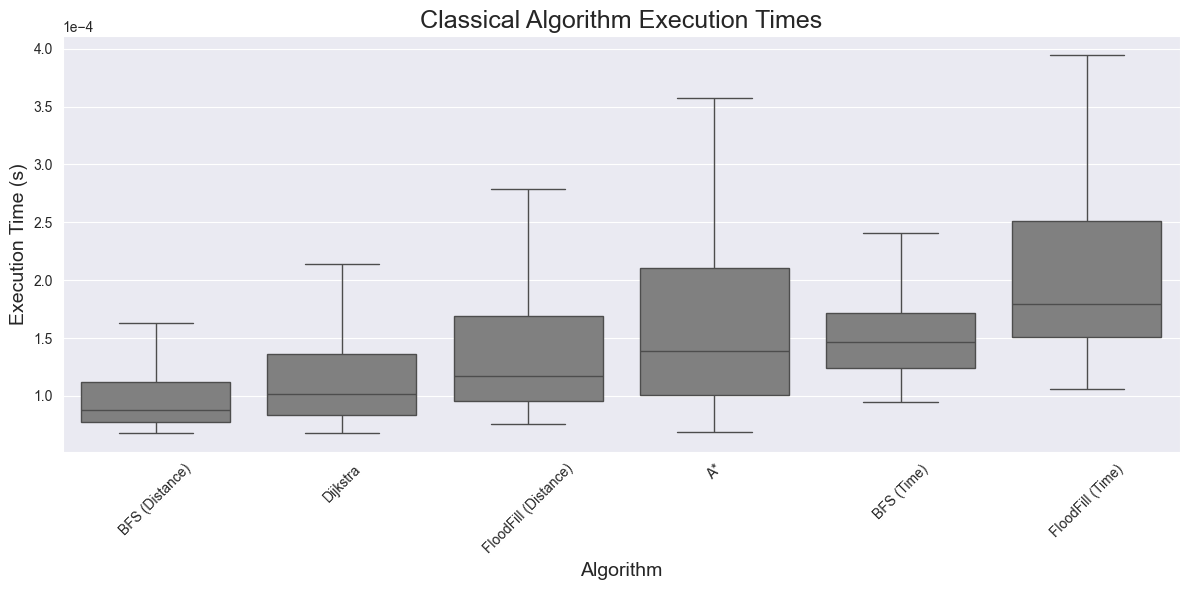

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Define the list of DataFrames and their corresponding algorithm names
dfs = [
    ('FloodFill (Distance)', df_flood_fill),
    ('BFS (Distance)', df_bfs),
    ('A*', df_astar),
    ('Dijkstra', df_dijkstra),
    ('FloodFill (Time)', df_flood_fill_time),
    ('BFS (Time)', df_bfs_time)
]

# Create a list of DataFrames with an additional 'Algorithm' column
df_list = []
for name, df in dfs:
    df_copy = df.copy()  # Ensure we don't modify the original DataFrame
    df_copy['Algorithm'] = name
    df_list.append(df_copy)

# Combine all DataFrames
df_combined_RL = pd.concat(df_list, ignore_index=True)

# Convert Execution Time from microseconds to seconds
df_combined_RL['Execution Time (secs)'] = df_combined_RL['Execution Time (micro secs)'] * pow(10, -6)

# Calculate median execution time for sorting
median_execution_time = df_combined_RL.groupby('Algorithm')['Execution Time (secs)'].median().sort_values()

# Sort the DataFrame based on the median execution time
df_combined_RL['Algorithm'] = pd.Categorical(df_combined_RL['Algorithm'], categories=median_execution_time.index, ordered=True)
df_combined_RL = df_combined_RL.sort_values('Algorithm')

# Set up the figure for the execution time plot
plt.figure(figsize=(12, 6))

# Use a single shade of gray
sns.boxplot(x='Algorithm', y='Execution Time (secs)', data=df_combined_RL, showfliers=False, color='gray')
plt.title('Classical Algorithm Execution Times', fontsize=18)
plt.ticklabel_format(axis='y', style='sci',scilimits=(4,0))
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Execution Time (s)', fontsize=14)
plt.xticks(rotation=45)

# Set the y-ticks manually to avoid repetition
# y_ticks = [0, 1e-4, 2e-4, 3e-4, 4e-4]
# y_labels = ['0', '1', '2', '3', '4']
# plt.yticks(y_ticks, y_labels)

# Add a power of 10^-4 label next to the y-axis label
# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as PDF, EPS, and SVG
plt.savefig('results/figures/results-section/execution_time_classical_comparison.pdf', format='pdf')

# Show the plot
plt.show()


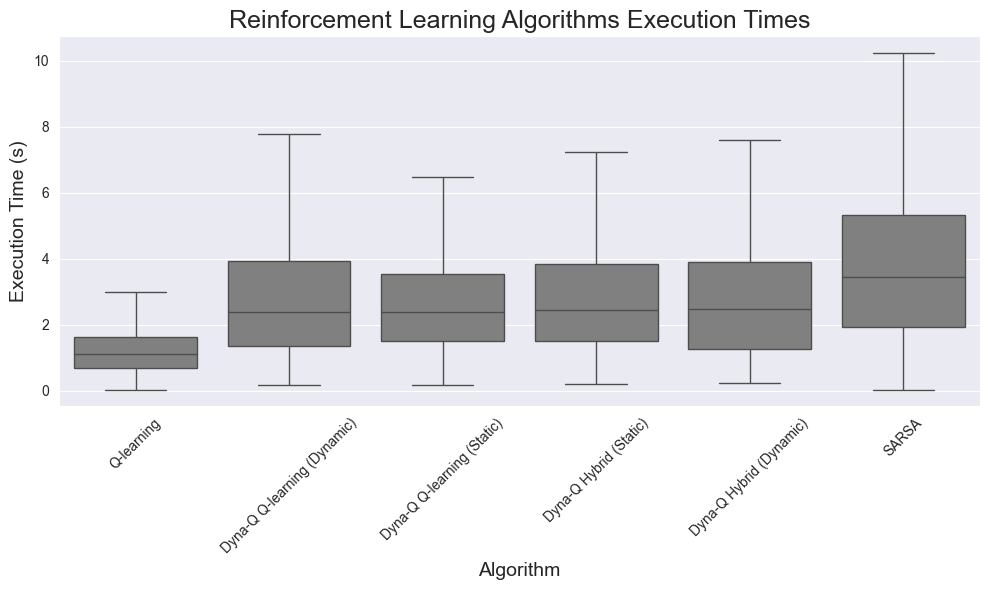

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Define the list of DataFrames and their corresponding algorithm names
dfs = [
    ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('Dyna-Q Q-learning (Static)', df_dyna_qlearning_arbt),
    ('Dyna-Q Q-learning (Dynamic)', df_dyna_qlearning_time),
    ('Dyna-Q Hybrid (Static)', dynaq_sarsa_arbt),
    ('Dyna-Q Hybrid (Dynamic)', dynaq_sarsa_time)
]

# Create a list of DataFrames with an additional 'Algorithm' column
df_list = []
for name, df in dfs:
    df_copy = df.copy()  # Ensure we don't modify the original DataFrame
    df_copy['Algorithm'] = name
    df_list.append(df_copy)

# Combine all DataFrames
df_combined_RL = pd.concat(df_list, ignore_index=True)

# Convert Execution Time from microseconds to seconds
df_combined_RL['Execution Time (secs)'] = df_combined_RL['Execution Time (micro secs)'] * pow(10, -6)

# Calculate median execution time for sorting
median_execution_time = df_combined_RL.groupby('Algorithm')['Execution Time (secs)'].median().sort_values()

# Sort the DataFrame based on the median execution time
df_combined_RL['Algorithm'] = pd.Categorical(df_combined_RL['Algorithm'], categories=median_execution_time.index, ordered=True)
df_combined_RL = df_combined_RL.sort_values('Algorithm')

# Set up the figure for the execution time plot
plt.figure(figsize=(10, 6))

# Use a single shade of gray
sns.boxplot(x='Algorithm', y='Execution Time (secs)', data=df_combined_RL, showfliers=False, color='gray')
plt.title('Reinforcement Learning Algorithms Execution Times', fontsize=18)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Execution Time (s)', fontsize=14)
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as PDF, EPS, and SVG
plt.savefig('results/figures/results-section/execution_time_RL_comparison.pdf', format='pdf')

# Show the plot
plt.show()


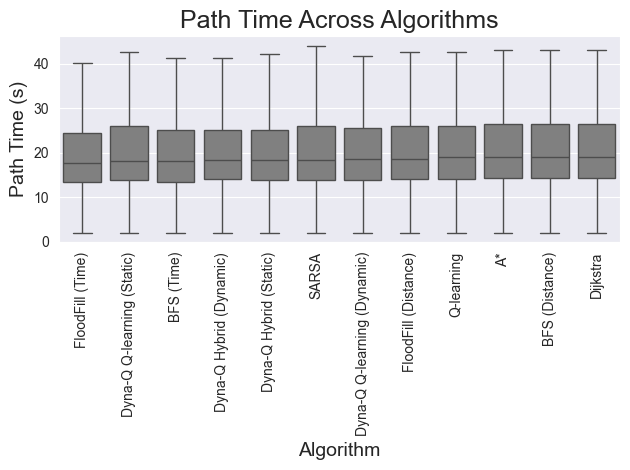

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Define the list of DataFrames and their corresponding algorithm names
dfs = [
    ('FloodFill (Distance)', df_flood_fill),
    ('BFS (Distance)', df_bfs),
    ('A*', df_astar),
    ('Dijkstra', df_dijkstra),
    ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('Dyna-Q Q-learning (Static)', df_dyna_qlearning_arbt),
    ('Dyna-Q Q-learning (Dynamic)', df_dyna_qlearning_time),
    ('Dyna-Q Hybrid (Static)', dynaq_sarsa_arbt),
    ('Dyna-Q Hybrid (Dynamic)', dynaq_sarsa_time),
    ('FloodFill (Time)', df_flood_fill_time),
    ('BFS (Time)', df_bfs_time)
]

# Create a list of DataFrames with an additional 'Algorithm' column
df_list = []
for name, df in dfs:
    df_copy = df.copy()  # Ensure we don't modify the original DataFrame
    df_copy['Algorithm'] = name
    df_list.append(df_copy)

# Combine all DataFrames
df_combined_RL = pd.concat(df_list, ignore_index=True)

# Convert Execution Time from microseconds to seconds

# Calculate median execution time for sorting
median_execution_time = df_combined_RL.groupby('Algorithm')['Path Time (s)'].median().sort_values()

# Sort the DataFrame based on the median execution time
df_combined_RL['Algorithm'] = pd.Categorical(df_combined_RL['Algorithm'], categories=median_execution_time.index, ordered=True)
df_combined_RL = df_combined_RL.sort_values('Algorithm')

# Set up the figure for the execution time plot
plt.figure()

# Use a single shade of gray
sns.boxplot(x='Algorithm', y='Path Time (s)', data=df_combined_RL, showfliers=False, color='gray')
plt.title('Path Time Across Algorithms', fontsize=18)
plt.xlabel('Algorithm',  fontsize=14)
plt.ylabel('Path Time (s)', fontsize=14)
plt.xticks(rotation=90)

# Add a legend with different shades representing different algorithms
legend_labels = median_execution_time.index.tolist()
legend_colors = sns.color_palette("Greys", len(legend_labels))


# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as PDF, EPS, and SVG
plt.savefig('results/figures/results-section/path_time_boxplot.pdf', format='pdf')
# plt.savefig('results/figures/results-section/execution_time_comparison.eps', format='eps')
# plt.savefig('results/figures/results-section/execution_time_comparison.svg', format='svg')

# Show the plot
plt.show()


In [53]:
median_execution_time

Algorithm
FloodFill (Time)               17.676471
Dyna-Q Q-learning (Static)     18.148255
BFS (Time)                     18.182607
Dyna-Q Hybrid (Dynamic)        18.305871
Dyna-Q Hybrid (Static)         18.452263
SARSA                          18.468694
Dyna-Q Q-learning (Dynamic)    18.561821
FloodFill (Distance)           18.667844
Q-learning                     18.983606
A*                             19.089449
BFS (Distance)                 19.089449
Dijkstra                       19.089449
Name: Path Time (s), dtype: float64

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

dfs = [
    ('FloodFill (Distance)', df_flood_fill),
    ('BFS (Distance)', df_bfs),
    # ('A*', df_astar),
    # ('Dijkstra', df_dijkstra),
    ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('Dyna-Q Q-learning (Static)', df_dyna_qlearning_arbt),
    ('Dyna-Q Q-learning (Dynamic)', df_dyna_qlearning_time),
    ('Dyna-Q Hybrid (Static)', dynaq_sarsa_arbt),
    ('Dyna-Q Hybrid (Dynamic)', dynaq_sarsa_time),
    ('FloodFill (Time)', df_flood_fill_time),
    ('BFS (Time)', df_bfs_time)
]


# Create a list of DataFrames with an additional 'Algorithm' column
df_list = []
for name, df in dfs:
    df['Algorithm'] = name
    df_list.append(df)

# Combine all DataFrames
df_combined = pd.concat(df_list)

In [55]:
df_merged = df_flood_fill[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'FloodFill'})

dfs = [
    ('BFS (Distance)', df_bfs),
    # ('A*', df_astar),
    # ('Dijkstra', df_dijkstra),
    # ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('Dyna-Q Q-learning (Static)', df_dyna_qlearning_arbt),
    ('Dyna-Q Q-learning (Dynamic)', df_dyna_qlearning_time),
    ('Dyna-Q Hybrid (Static)', dynaq_sarsa_arbt),
    ('Dyna-Q Hybrid (Dynamic)', dynaq_sarsa_time),
    ('FloodFill (Time)', df_flood_fill_time),
    ('BFS (Time)', df_bfs_time)
]

for name, df in dfs:
    df_merged = pd.merge(df_merged, df[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': name}), on='Maze Name')


In [56]:
df_merged

,Maze Name,FloodFill,BFS (Distance),Q-learning,Dyna-Q Q-learning (Static),Dyna-Q Q-learning (Dynamic),Dyna-Q Hybrid (Static),Dyna-Q Hybrid (Dynamic),FloodFill (Time),BFS (Time)
0,13ye,18.241782,19.481086,19.481086,18.241782,19.481086,18.241782,18.241782,18.241782,18.241782
1,50,27.575872,27.575872,25.670533,27.575872,26.195589,24.613396,25.429256,25.878193,24.613396
2,86,5.598013,5.598013,5.598013,5.598013,5.948080,5.948080,5.598013,5.598013,5.598013
3,87sin,13.623074,14.794908,13.623074,13.623074,13.469986,14.794908,14.305615,14.794908,13.623074
4,87us1,24.619658,24.619658,30.818586,24.619658,24.619658,24.619658,24.619658,23.490347,23.490347
...,...,...,...,...,...,...,...,...,...,...
486,xx,9.109604,11.547772,9.109604,9.762001,9.109604,9.762001,9.109604,9.109604,9.109604
487,yama2002,14.739266,14.739266,16.072963,16.270821,18.960779,16.270821,17.427359,14.739266,14.739266
488,yama7,12.889292,12.889292,12.889292,12.889292,13.515968,11.947489,12.889292,11.947489,12.889292
489,yama89,10.080208,11.259959,11.733534,10.235953,10.080208,10.080208,10.235953,10.100664,10.100664


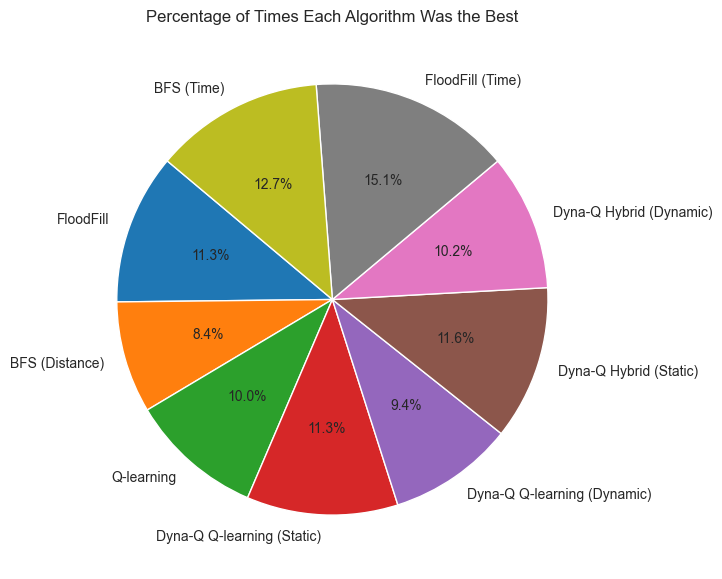

1860


In [57]:
best_algorithm_counts = {col: 0 for col in df_merged.columns if col != 'Maze Name'}
count = 0
# Iterate over each maze
for _, row in df_merged.iterrows():
    # Find the minimum path time for the maze
    min_time = row.drop('Maze Name').min()
    
    # Find the algorithms that achieved this minimum time
    best_algorithms = row[row == min_time].index
    
    # Distribute the "credit" equally among the algorithms with the best time
    count += len(best_algorithms)
    for algorithm in best_algorithms:
        best_algorithm_counts[algorithm] += 1
    
for name, val in best_algorithm_counts.items():
    best_algorithm_counts[name] = val/count

# Convert the dictionary to a series for easier plotting
best_algorithm_counts = pd.Series(best_algorithm_counts)

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(best_algorithm_counts, labels=best_algorithm_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab10"))
plt.title('Percentage of Times Each Algorithm Was the Best')
plt.savefig('results/figures/results-section/pie-charts/all_alg_compare.pdf', format='pdf')

plt.show()
print(count)

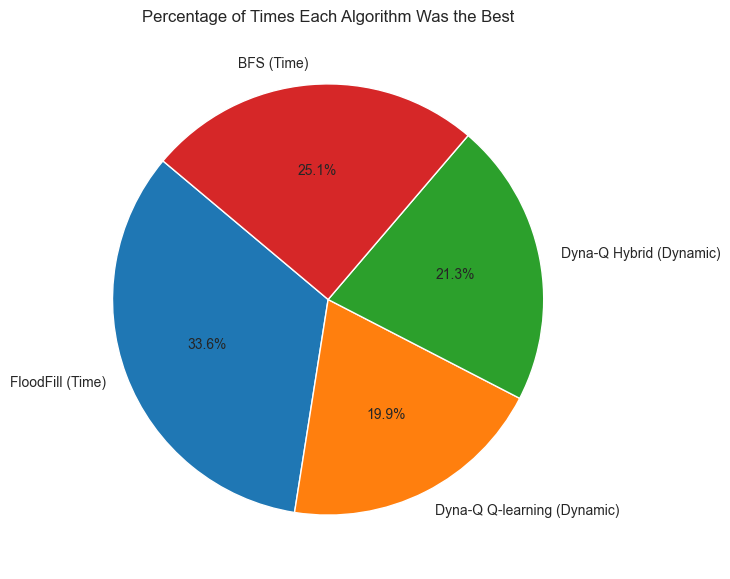

In [58]:
df_merged = df_flood_fill_time[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'FloodFill (Time)'})

dfs = [
    ('Dyna-Q Q-learning (Dynamic)', df_dyna_qlearning_time),
    ('Dyna-Q Hybrid (Dynamic)', dynaq_sarsa_time),
    ('BFS (Time)', df_bfs_time)
]

for name, df in dfs:
    df_merged = pd.merge(df_merged, df[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': name}),
                         on='Maze Name')

df_merged
best_algorithm_counts = {col: 0 for col in df_merged.columns if col != 'Maze Name'}

# Iterate over each maze
for _, row in df_merged.iterrows():
    # Find the minimum path time for the maze
    min_time = row.drop('Maze Name').min()

    # Find the algorithms that achieved this minimum time
    best_algorithms = row[row == min_time].index

    # Distribute the "credit" equally among the algorithms with the best time
    credit = 1.0 / len(best_algorithms)
    for algorithm in best_algorithms:
        best_algorithm_counts[algorithm] += credit

# Convert the dictionary to a series for easier plotting
best_algorithm_counts = pd.Series(best_algorithm_counts)

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(best_algorithm_counts, labels=best_algorithm_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("tab10"))
plt.title('Percentage of Times Each Algorithm Was the Best')
plt.show()


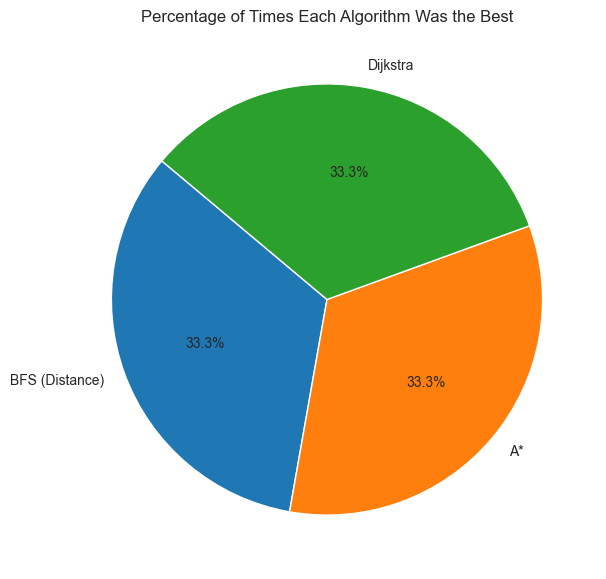

In [59]:
df_merged = df_bfs[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'BFS (Distance)'})

dfs = [
    ('A*', df_astar),
    ('Dijkstra', df_dijkstra),
]

for name, df in dfs:
    df_merged = pd.merge(df_merged, df[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': name}),
                         on='Maze Name')

best_algorithm_counts = {col: 0 for col in df_merged.columns if col != 'Maze Name'}

# Iterate over each maze
for _, row in df_merged.iterrows():
    # Find the minimum path time for the maze
    min_time = row.drop('Maze Name').min()

    # Find the algorithms that achieved this minimum time
    best_algorithms = row[row == min_time].index

    # Distribute the "credit" equally among the algorithms with the best time
    credit = 1.0 / len(best_algorithms)
    for algorithm in best_algorithms:
        best_algorithm_counts[algorithm] += credit

# Convert the dictionary to a series for easier plotting
best_algorithm_counts = pd.Series(best_algorithm_counts)

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(best_algorithm_counts, labels=best_algorithm_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("tab10"))
plt.title('Percentage of Times Each Algorithm Was the Best')
plt.savefig('results/figures/results-section/pie-charts/BFS_A_Dij_compare.pdf', format='pdf')

plt.show()


In [60]:

# Assuming dfs is defined as in your code snippet
dfs = [
    ('FloodFill (Distance)', df_flood_fill),
    ('BFS (Distance)', df_bfs),
    ('A*', df_astar),
    ('Dijkstra', df_dijkstra),
    ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('Dyna-Q Q-learning (Static)', df_dyna_qlearning_arbt),
    ('Dyna-Q Q-learning (Dynamic)', df_dyna_qlearning_time),
    ('Dyna-Q Hybrid (Static)', dynaq_sarsa_arbt),
    ('Dyna-Q Hybrid (Dynamic)', dynaq_sarsa_time),
    ('FloodFill (Time)', df_flood_fill_time),
    ('BFS (Time)', df_bfs_time)
]

# Create a list of DataFrames with an additional 'Algorithm' column
df_list = []
for name, df in dfs:
    df_copy = df.copy()  # Ensure we don't modify the original DataFrame
    df_copy['Algorithm'] = name
    df_list.append(df_copy)

# Combine all DataFrames
df_combined_RL = pd.concat(df_list, ignore_index=True)

# Set the index to 'Algorithm'
df_combined_RL.set_index('Algorithm', inplace=True)

In [61]:
df = df_combined_RL['Path Time (s)'].groupby('Algorithm').median()

In [62]:
pd.DataFrame(df)

,Path Time (s)
Algorithm,
A*,19.089449
BFS (Distance),19.089449
BFS (Time),18.182607
Dijkstra,19.089449
Dyna-Q Hybrid (Dynamic),18.305871
Dyna-Q Hybrid (Static),18.452263
Dyna-Q Q-learning (Dynamic),18.561821
Dyna-Q Q-learning (Static),18.148255
FloodFill (Distance),18.667844


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

dfs = [
    ('FloodFill (Distance)', df_flood_fill),
    ('BFS (Distance)', df_bfs),
    ('A*', df_astar),
    ('Dijkstra', df_dijkstra),
    ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('Dyna-Q Q-learning (Static)', df_dyna_qlearning_arbt),
    ('Dyna-Q Q-learning (Dynamic)', df_dyna_qlearning_time),
    ('Dyna-Q Hybrid (Static)', dynaq_sarsa_arbt),
    ('Dyna-Q Hybrid (Dynamic)', dynaq_sarsa_time),
    ('FloodFill (Time)', df_flood_fill_time),
    ('BFS (Time)', df_bfs_time)
]


# Create a list of DataFrames with an additional 'Algorithm' column
df_list = []
for name, df in dfs:
    df['Algorithm'] = name
    df_list.append(df)

# Combine all DataFrames
df_combined = pd.concat(df_list)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

dfs = [
    ('FloodFill (Distance)', df_flood_fill),
    ('BFS (Distance)', df_bfs),
    ('A*', df_astar),
    ('Dijkstra', df_dijkstra),
    ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('Dyna-Q Q-learning (Static)', df_dyna_qlearning_arbt),
    ('Dyna-Q Q-learning (Dynamic)', df_dyna_qlearning_time),
    ('Dyna-Q Hybrid (Static)', dynaq_sarsa_arbt),
    ('Dyna-Q Hybrid (Dynamic)', dynaq_sarsa_time),
    ('FloodFill (Time)', df_flood_fill_time),
    ('BFS (Time)', df_bfs_time)
]


# Create a list of DataFrames with an additional 'Algorithm' column
df_list = []
for name, df in dfs:
    df['Algorithm'] = name
    df_list.append(df)

# Combine all DataFrames
df_combined = pd.concat(df_list)

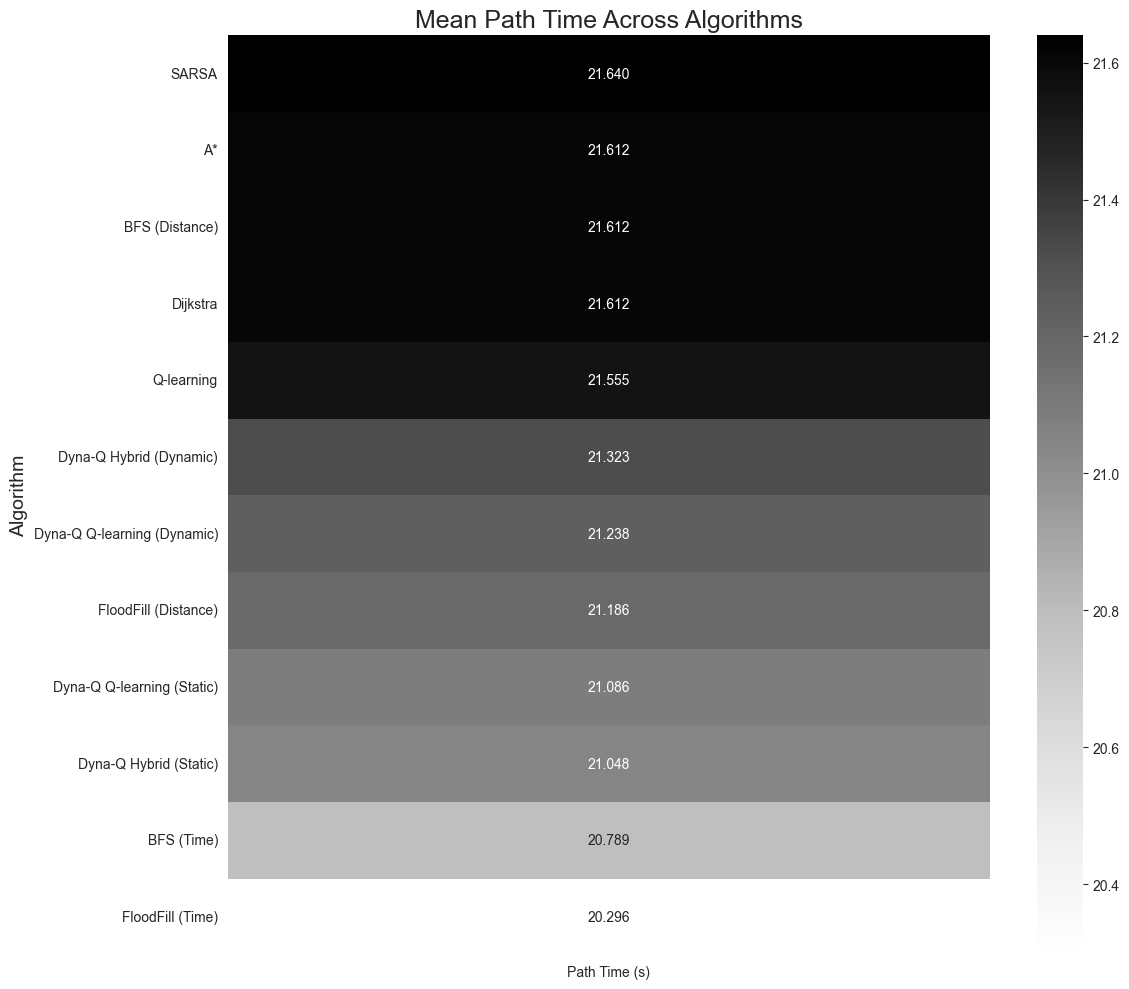

In [14]:
df_pivot = df_combined.pivot_table(index='Algorithm', values=['Path Time (s)'])

df_pivot = df_pivot.sort_values(by='Path Time (s)', ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(df_pivot, annot=True, fmt=".3f", cmap='Greys', cbar_kws={'label': ''})

plt.title('Mean Path Time Across Algorithms', fontsize=18)
plt.ylabel('Algorithm', fontsize=14)
plt.tight_layout()

plt.savefig('results/figures/results-section/path_times_comparison.pdf', format='pdf')

plt.show()


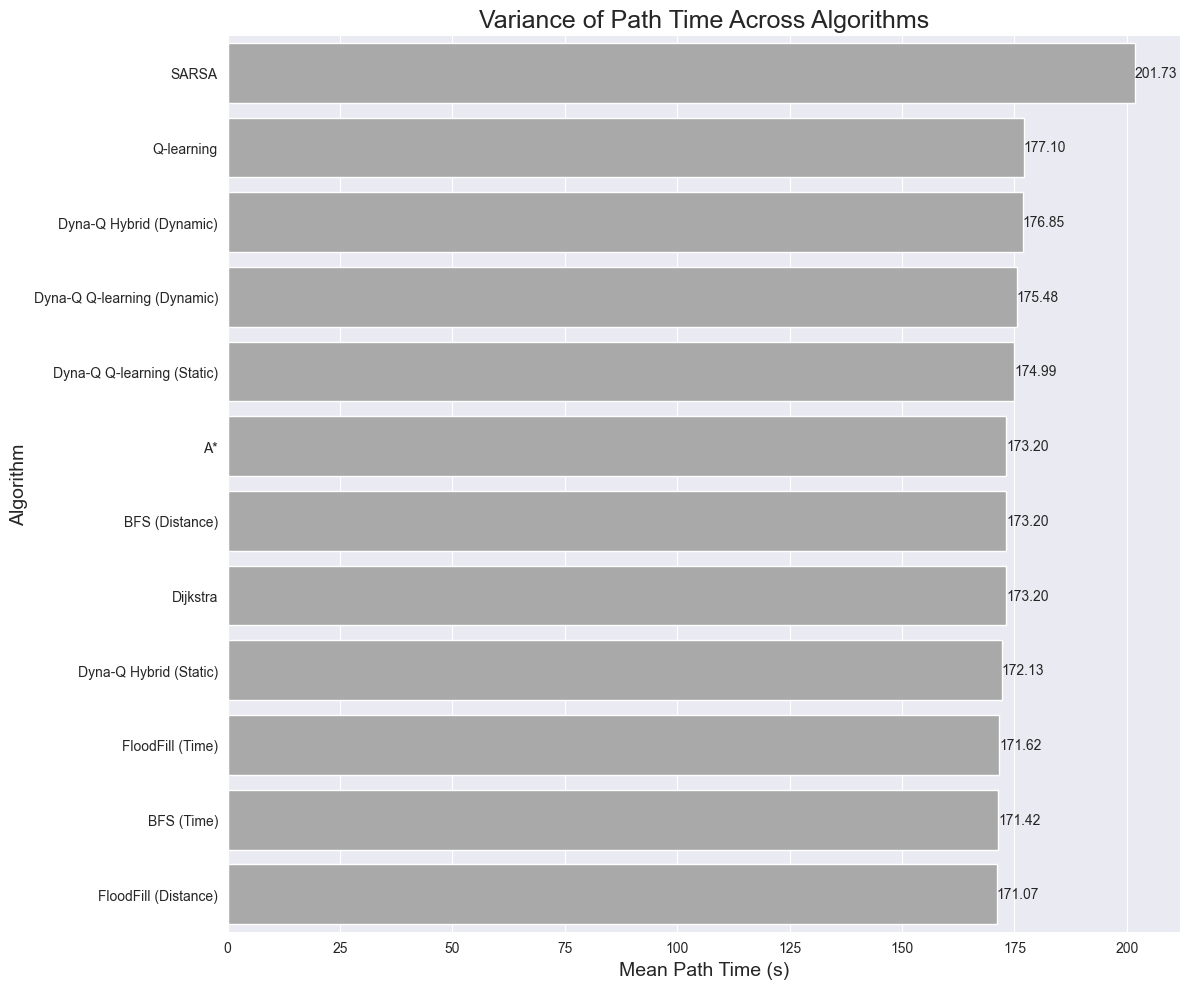

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot and sort the DataFrame
df_pivot = df_combined.pivot_table(index='Algorithm', values=['Path Time (s)'], aggfunc={'Path Time (s)': "var"})
df_pivot = df_pivot.sort_values(by='Path Time (s)', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x='Path Time (s)', y=df_pivot.index, data=df_pivot, color='Darkgray')

# Add annotations for each bar
for index, value in enumerate(df_pivot['Path Time (s)']):
    plt.text(value, index, f'{value:.2f}', va='center')

# Customize the chart
plt.title('Variance of Path Time Across Algorithms', fontsize=18)
plt.xlabel('Mean Path Time (s)', fontsize=14)
plt.ylabel('Algorithm', fontsize=14)
plt.tight_layout()

# Save the chart
plt.savefig('results/figures/results-section/path_times_comparison_variance.pdf', format='pdf')

# Display the chart
plt.show()


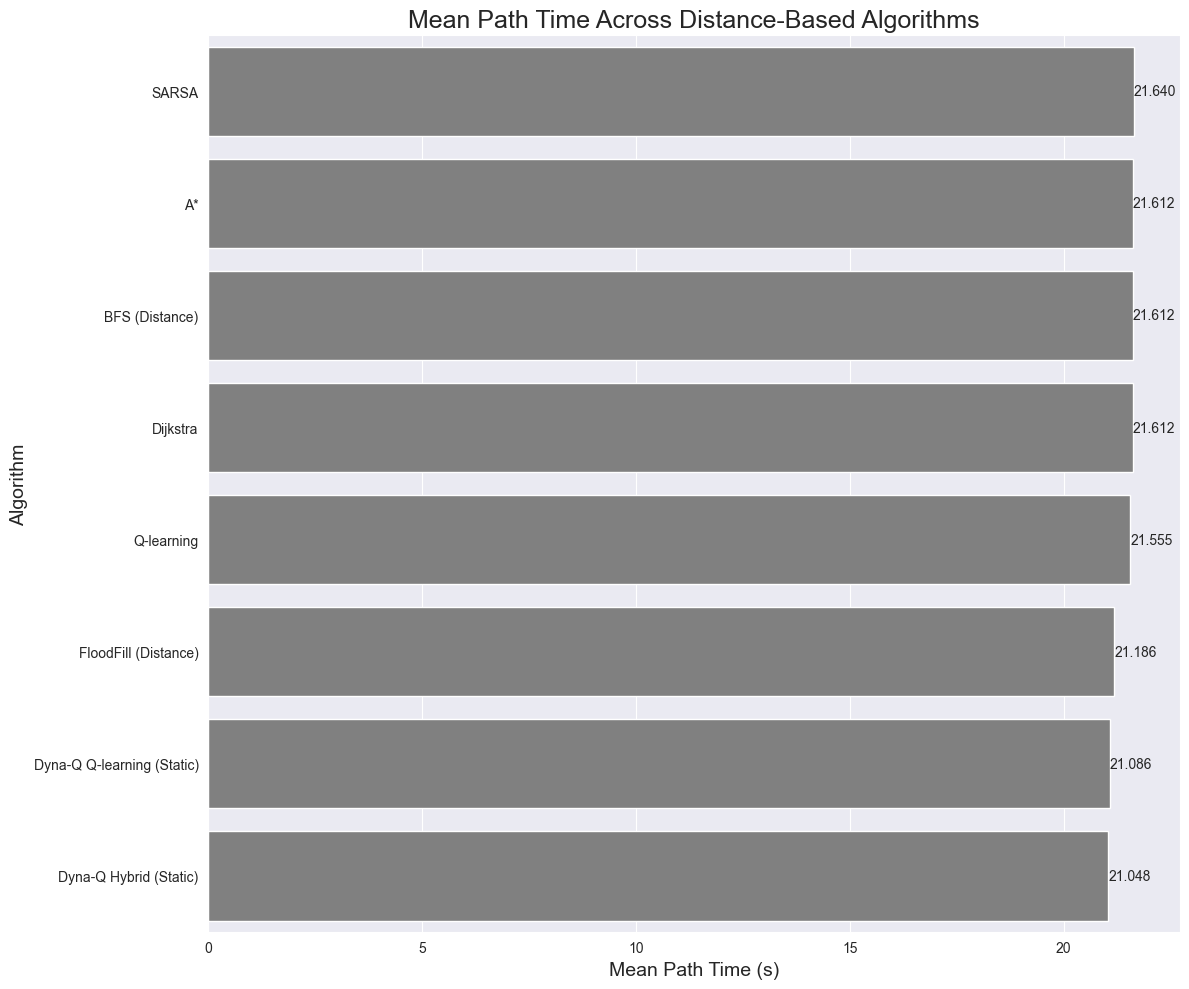

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

dfs = [
    ('FloodFill (Distance)', df_flood_fill),
    ('BFS (Distance)', df_bfs),
    ('A*', df_astar),
    ('Dijkstra', df_dijkstra),
    ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('Dyna-Q Q-learning (Static)', df_dyna_qlearning_arbt),
    ('Dyna-Q Hybrid (Static)', dynaq_sarsa_arbt),
]


# Create a list of DataFrames with an additional 'Algorithm' column
df_list = []
for name, df in dfs:
    df['Algorithm'] = name
    df_list.append(df)

# Combine all DataFrames
df_combined = pd.concat(df_list)

# Pivot and sort the DataFrame
df_pivot = df_combined.pivot_table(index='Algorithm', values=['Path Time (s)'])
df_pivot = df_pivot.sort_values(by='Path Time (s)', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x='Path Time (s)', y=df_pivot.index, data=df_pivot, color='Grey')

# Add annotations for each bar
for index, value in enumerate(df_pivot['Path Time (s)']):
    plt.text(value, index, f'{value:.3f}', va='center')

# Customize the chart
plt.title('Mean Path Time Across Distance-Based Algorithms', fontsize=18)
plt.xlabel('Mean Path Time (s)', fontsize=14)
plt.ylabel('Algorithm', fontsize=14)
plt.tight_layout()

# Save the chart
plt.savefig('results/figures/results-section/distance_based_path_times_comparison.pdf', format='pdf')

# Display the chart
plt.show()


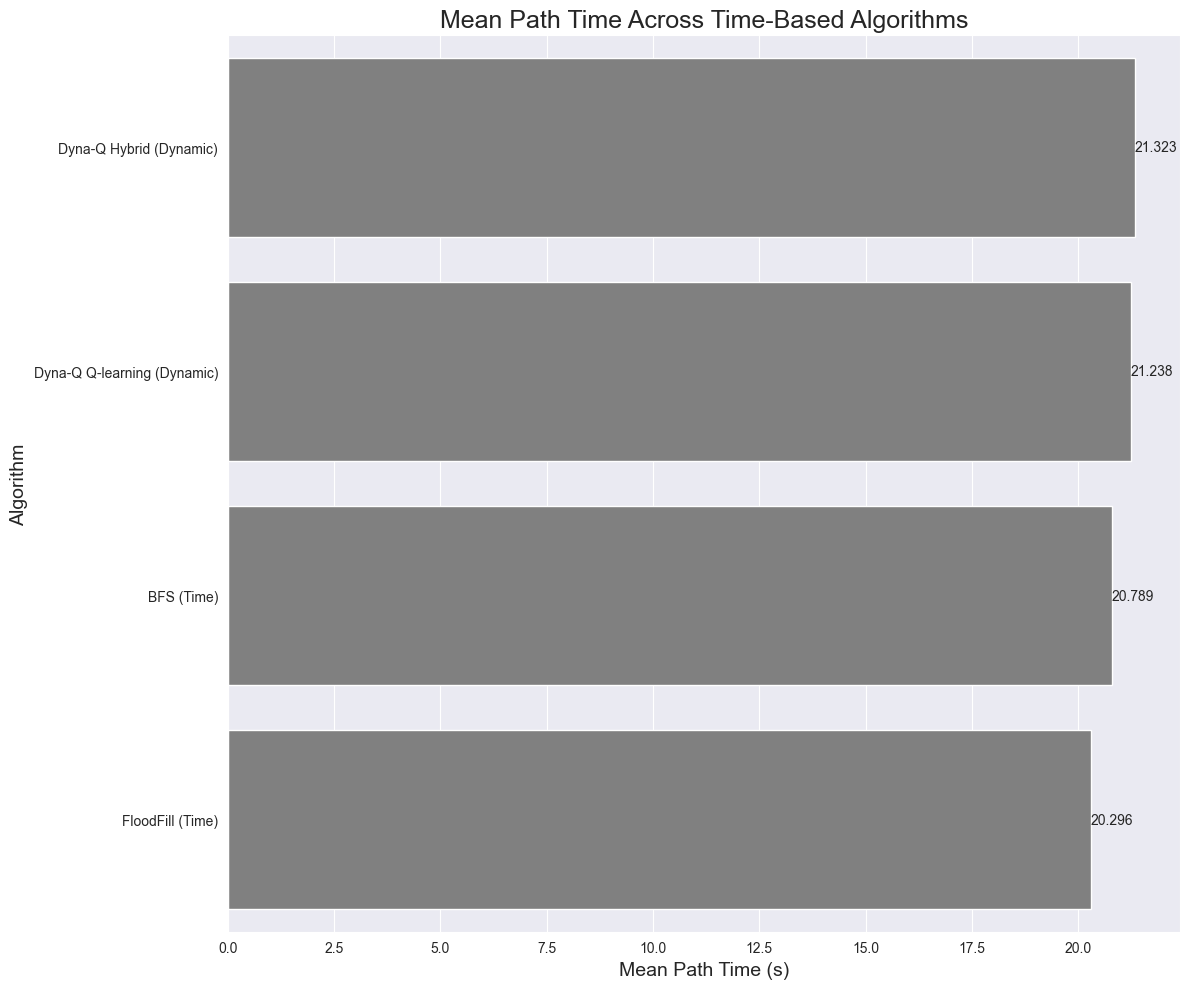

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

dfs = [
    ('Dyna-Q Q-learning (Dynamic)', df_dyna_qlearning_time),
    ('Dyna-Q Hybrid (Dynamic)', dynaq_sarsa_time),
    ('FloodFill (Time)', df_flood_fill_time),
    ('BFS (Time)', df_bfs_time)
]


# Create a list of DataFrames with an additional 'Algorithm' column
df_list = []
for name, df in dfs:
    df['Algorithm'] = name
    df_list.append(df)

# Combine all DataFrames
df_combined = pd.concat(df_list)

# Pivot and sort the DataFrame
df_pivot = df_combined.pivot_table(index='Algorithm', values=['Path Time (s)'])
df_pivot = df_pivot.sort_values(by='Path Time (s)', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x='Path Time (s)', y=df_pivot.index, data=df_pivot, color='Grey')

# Add annotations for each bar
for index, value in enumerate(df_pivot['Path Time (s)']):
    plt.text(value, index, f'{value:.3f}', va='center')

# Customize the chart
plt.title('Mean Path Time Across Time-Based Algorithms', fontsize=18)
plt.xlabel('Mean Path Time (s)', fontsize=14)
plt.ylabel('Algorithm', fontsize=14)
plt.tight_layout()

# Save the chart
plt.savefig('results/figures/results-section/time_based_path_times_comparison.pdf', format='pdf')

# Display the chart
plt.show()


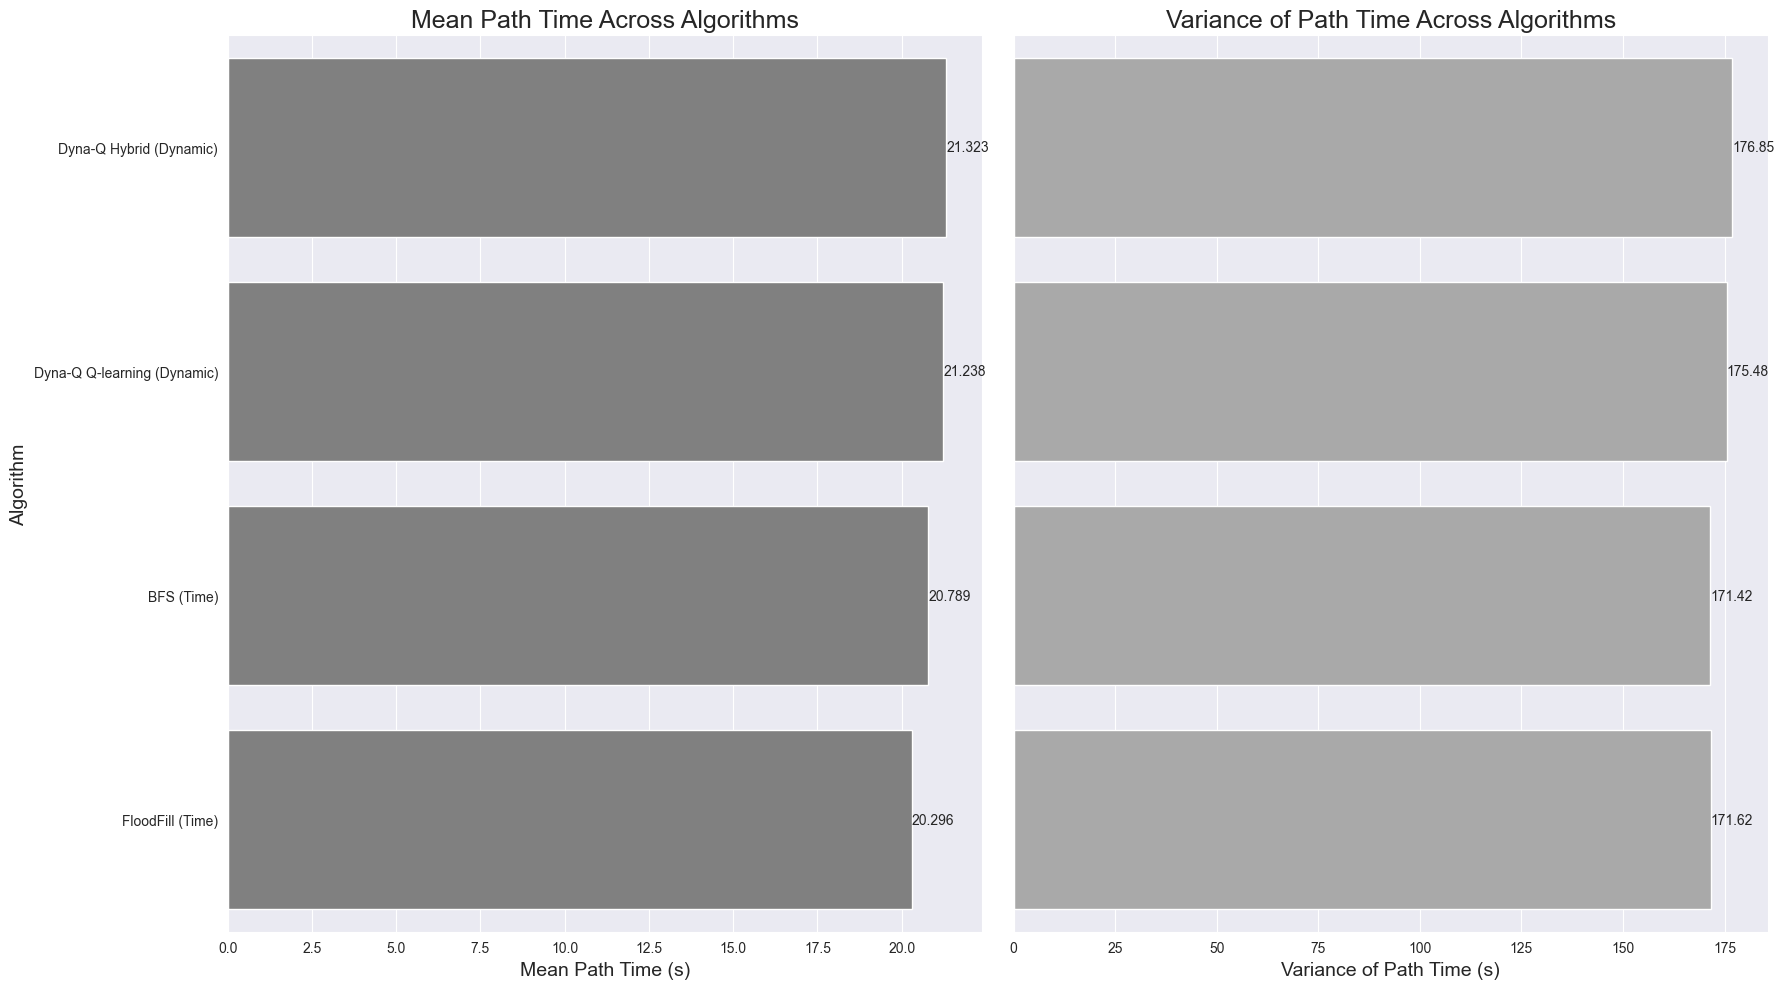

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot and sort the DataFrame based on Mean Path Time
df_pivot_mean = df_combined.pivot_table(index='Algorithm', values=['Path Time (s)'])
df_pivot_mean = df_pivot_mean.sort_values(by='Path Time (s)', ascending=False)

# Reorder the variance DataFrame according to the order in the mean DataFrame
df_pivot_var = df_combined.pivot_table(index='Algorithm', values=['Path Time (s)'], aggfunc='var')
df_pivot_var = df_pivot_var.reindex(df_pivot_mean.index)

# Prepare the figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 10), sharey=True)

# First Bar Chart: Mean Path Time Across Algorithms
sns.barplot(x='Path Time (s)', y=df_pivot_mean.index, data=df_pivot_mean, ax=axs[0], color='Grey')
for index, value in enumerate(df_pivot_mean['Path Time (s)']):
    axs[0].text(value, index, f'{value:.3f}', va='center')

axs[0].set_title('Mean Path Time Across Algorithms', fontsize=18)
axs[0].set_xlabel('Mean Path Time (s)', fontsize=14)
axs[0].set_ylabel('Algorithm', fontsize=14)

# Second Bar Chart: Variance of Path Time Across Algorithms (ordered by Mean Path Time)
sns.barplot(x='Path Time (s)', y=df_pivot_var.index, data=df_pivot_var, ax=axs[1], color='Darkgray')
for index, value in enumerate(df_pivot_var['Path Time (s)']):
    axs[1].text(value, index, f'{value:.2f}', va='center')

axs[1].set_title('Variance of Path Time Across Algorithms', fontsize=18)
axs[1].set_xlabel('Variance of Path Time (s)', fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure with both charts side by side
plt.savefig('results/figures/results-section/path_times_comparison_side_by_side.pdf', format='pdf')

# Display the chart
plt.show()


So add 1 event and pie chart where there is multiple fastest

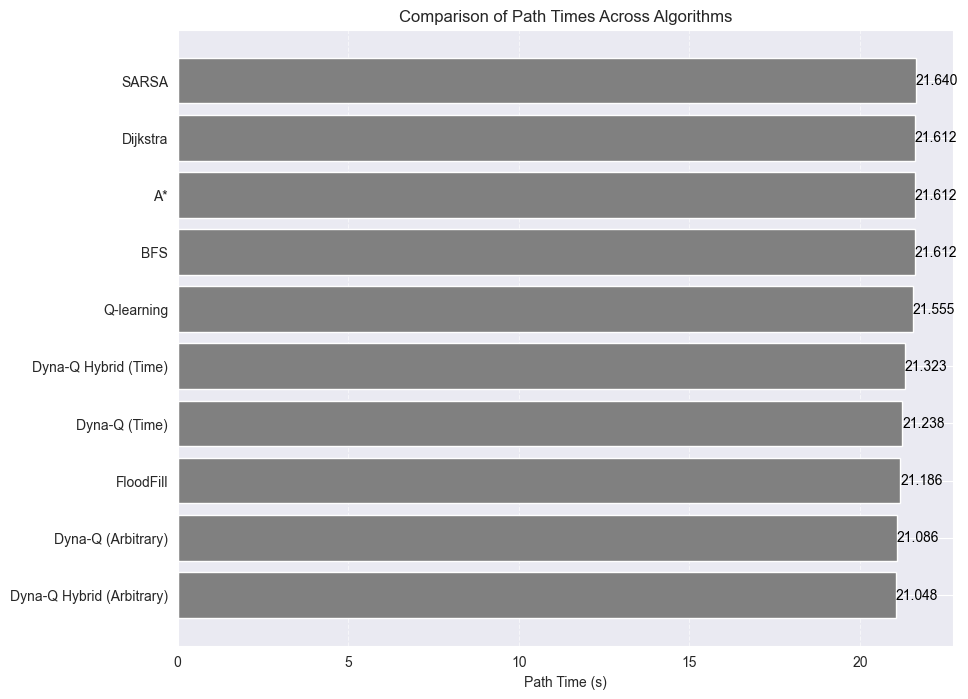

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
df_flood_fill = pd.read_csv('results/csv_files/competition/final/flood_fill.csv')
df_bfs = pd.read_csv('results/csv_files/competition/final/bfs.csv')
df_astar = pd.read_csv('results/csv_files/competition/final/astar.csv')
df_dijkstra = pd.read_csv('results/csv_files/competition/final/dijkstra.csv')
df_sarsa = pd.read_csv('results/csv_files/competition/final/sarsa_using_arbitrary.csv')
df_qlearning = pd.read_csv('results/csv_files/competition/final/qlearning_using_arbitrary.csv')
df_dyna_qlearning_arbt = pd.read_csv('results/csv_files/competition/final/dyna_qlearning_using_arbitrary.csv')
df_dyna_qlearning_time = pd.read_csv('results/csv_files/competition/final/dyna_qlearning_using_time.csv')
df_dynaq_sarsa_arbt = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_arbitrary.csv')
df_dynaq_sarsa_time = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_time.csv')

# Combine the data for path times
data = {
    'Algorithm': [
        'FloodFill', 'BFS', 'A*', 'Dijkstra', 
        'SARSA', 'Q-learning', 'Dyna-Q (Arbitrary)', 'Dyna-Q (Time)', 
        'Dyna-Q Hybrid (Arbitrary)', 'Dyna-Q Hybrid (Time)'
    ],
    'Path Time (s)': [
        df_flood_fill['Path Time (s)'].mean(),
        df_bfs['Path Time (s)'].mean(),
        df_astar['Path Time (s)'].mean(),
        df_dijkstra['Path Time (s)'].mean(),
        df_sarsa['Path Time (s)'].mean(),
        df_qlearning['Path Time (s)'].mean(),
        df_dyna_qlearning_arbt['Path Time (s)'].mean(),
        df_dyna_qlearning_time['Path Time (s)'].mean(),
        df_dynaq_sarsa_arbt['Path Time (s)'].mean(),
        df_dynaq_sarsa_time['Path Time (s)'].mean()
    ]
}

# Create a DataFrame
df_combined = pd.DataFrame(data)

# Sort the DataFrame by 'Path Time (s)' for better visualization
df_combined.sort_values(by='Path Time (s)', ascending=True, inplace=True)

# Plot the bar chart
plt.figure(figsize=(10, 8))
plt.barh(df_combined['Algorithm'], df_combined['Path Time (s)'], color='gray')
plt.xlabel('Path Time (s)')
plt.title('Comparison of Path Times Across Algorithms')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate the bars with the path times (to 3 decimal places)
for index, value in enumerate(df_combined['Path Time (s)']):
    plt.text(value, index, f'{value:.3f}', va='center', ha='left', color='black')

plt.show()


So whats the likelihood of doing better even though the mean is greater soemtimes? 

In [71]:
import pandas as pd

# Load your data
df_flood_fill = pd.read_csv('results/csv_files/competition/final/flood_fill.csv')
df_dyna_qlearning_arbt = pd.read_csv('results/csv_files/competition/final/dyna_qlearning_using_arbitrary.csv')
df_dyna_qlearning_time = pd.read_csv('results/csv_files/competition/dyna_q/dyna_qlearning_using_time.csv')
df_dynaq_sarsa_arbt = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_arbitrary.csv')
df_dynaq_sarsa_time = pd.read_csv('results/csv_files/competition/final/dynaq_sarsa_using_time.csv')

# Merge DataFrames on 'Maze Name'
df_combined = pd.merge(df_flood_fill[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'FloodFill'})
                       , df_dyna_qlearning_arbt[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'DynaQ_Learning_Arbt'}),
                       on='Maze Name')

df_combined = pd.merge(df_combined, df_dyna_qlearning_time[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'DynaQ_Learning_Time'}), on='Maze Name')
df_combined = pd.merge(df_combined, df_dynaq_sarsa_arbt[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'DynaQ_Sarsa_Arbt'}), on='Maze Name')
df_combined = pd.merge(df_combined, df_dynaq_sarsa_time[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'DynaQ_Sarsa_Time'}), on='Maze Name')

# Rename columns for clarity
# Count the number of times any of the algorithms performed better or the same as FloodFill
count_better = 0
bad = []
for _, row in df_combined.iterrows():
    if (
            # row['DynaQ_Learning_Arbt'] <= row['FloodFill'] or
        row['DynaQ_Learning_Time'] < row['FloodFill']):
        # row['DynaQ_Sarsa_Arbt'] <= row['FloodFill'] or
        # row['DynaQ_Sarsa_Time'] < row['FloodFill']):
            count_better += 1
# Calculate the probability
probability_better = count_better / len(df_combined)

print(f"The probability that any of the Dyna-Q algorithms performed better than FloodFill is {probability_better:.2f}, count = {count_better}")
print(bad)


The probability that any of the Dyna-Q algorithms performed better than FloodFill is 0.29, count = 142
[]


In [72]:
df_combined

,Maze Name,FloodFill,DynaQ_Learning_Arbt,DynaQ_Learning_Time,DynaQ_Sarsa_Arbt,DynaQ_Sarsa_Time
0,13ye,18.241782,18.241782,18.241782,18.241782,18.241782
1,50,27.575872,27.575872,27.575872,24.613396,25.429256
2,86,5.598013,5.598013,5.948080,5.948080,5.598013
3,87sin,13.623074,13.623074,13.036416,14.794908,14.305615
4,87us1,24.619658,24.619658,24.619658,24.619658,24.619658
...,...,...,...,...,...,...
486,xx,9.109604,9.762001,11.037284,9.762001,9.109604
487,yama2002,14.739266,16.270821,17.604517,16.270821,17.427359
488,yama7,12.889292,12.889292,14.100371,11.947489,12.889292
489,yama89,10.080208,10.235953,10.235953,10.080208,10.235953


The results show that there is a 34% chance that the RL algorithm with the dynamic reward system would perform better than FloodFill, and a 30% chance that it would give the same result. This equates to a 64% probability of performing better or at least the same.
When running both algorithms that use the dynamic reward structure, the probability of performing better increases to 44%, with an 86% chance of being better or the same. If we consider all four algorithms, the probability rises to 50% for performing better and 92% for being better or the same.
These results align with our expectations. While the mean and median differences may not be significant in the discussion, they do highlight that when the algorithms fail, they tend to get stuck in local minima.
Thanks again for your continued support.
Best regards,
Faris

In [73]:
# from algorithms.reinforcement_learning.q_learning.Qlearning import QLearning
# from algorithms.reinforcement_learning.sarsa.Sarsa import Sarsa
# from algorithms.reinforcement_learning.dynaq.DynaQLearning import DynaQLearning
# from algorithms.reinforcement_learning.dynaq.DynaQSarsa import DynaQSarsa
# from algorithms.utilities.Utils import Utils

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load the maze
# maze = Utils.load_maze('mazes/competition_json/87us1.json')

# # Initialize the algorithms
# qlearning = QLearning(walls=maze)
# sarsa = Sarsa(walls=maze)
# dynaq_qlearning_time = DynaQLearning(walls=maze)
# dynaq_qlearning_arbt = DynaQLearning(walls=maze, arbitrary=True)
# dynaq_sarsa_time = DynaQSarsa(walls=maze)
# dynaq_sarsa_arbt = DynaQSarsa(walls=maze, arbitrary=True)


# # Run the algorithms to get the learning curves (rewards over episodes)
# qlearning_rewards = qlearning.run_qlearning()
# sarsa_rewards = sarsa.run_sarsa()
# dynaq_qlearning_time_rewards = dynaq_qlearning_time.run_dyna_qlearning()
# dynaq_qlearning_arbt_rewards = dynaq_qlearning_arbt.run_dyna_qlearning()
# dynaq_sarsa_time_rewards = dynaq_sarsa_time.run_dyna_sarsa()
# dynaq_sarsa_arbt_rewards = dynaq_sarsa_arbt.run_dyna_sarsa()

# # Set up the subplots
# fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

# # Plot the learning curves
# ax[0, 0].plot(qlearning_rewards, label='Q-Learning')
# ax[0, 0].set_title('Q-Learning')
# ax[0, 0].set_xlabel('Episodes')
# ax[0, 0].set_ylabel('Accumulated Reward')

# ax[0, 1].plot(sarsa_rewards, label='SARSA', color='orange')
# ax[0, 1].set_title('SARSA')
# ax[0, 1].set_xlabel('Episodes')
# ax[0, 1].set_ylabel('Accumulated Reward')

# ax[1, 0].plot(dynaq_qlearning_time_rewards, label='Dyna-Q (Q-Learning) Dynamic Reward', color='green')
# ax[1, 0].set_title('Dyna-Q (Q-Learning) Dynamic Reward Structure')
# ax[1, 0].set_xlabel('Episodes')
# ax[1, 0].set_ylabel('Accumulated Reward')

# ax[1, 1].plot(dynaq_qlearning_arbt_rewards, label='Dyna-Q (Q-Learning) Static Reward', color='red')
# ax[1, 1].set_title('Dyna-Q (Q-Learning) Static Reward Structure')
# ax[1, 1].set_xlabel('Episodes')
# ax[1, 1].set_ylabel('Accumulated Reward')

# ax[2, 0].plot(dynaq_sarsa_time_rewards, label='Dyna-Q (Hybrid) Dynamic Reward', color='black')
# ax[2, 0].set_title('Dyna-Q (Hybrid) Dynamic Reward Structure')
# ax[2, 0].set_xlabel('Episodes')
# ax[2, 0].set_ylabel('Accumulated Reward')

# ax[2, 1].plot(dynaq_sarsa_arbt_rewards, label='Dyna-Q (Hybrid) Static Reward', color='purple')
# ax[2, 1].set_title('Dyna-Q (Hybrid) Static Reward Structure')
# ax[2, 1].set_xlabel('Episodes')
# ax[2, 1].set_ylabel('Accumulated Reward')

# # Adjust the layout for better spacing
# plt.tight_layout()

# plt.savefig('results/figures/results-section/RL_learning_curves.pdf', format='pdf')


# # Show the plot
# plt.show()


In [74]:
# import matplotlib.pyplot as plt
# import os

# # Load the maz

# # Create a directory for saving the figures
# output_dir = 'results/figures/results-section/learning_curves'
# os.makedirs(output_dir, exist_ok=True)

# # Plot and save each learning curve as a separate figure
# figures = [
#     ('Q-Learning', qlearning_rewards),
#     ('SARSA', sarsa_rewards),
#     ('Dyna-Q (Q-Learning) Dynamic Reward', dynaq_qlearning_time_rewards),
#     ('Dyna-Q (Q-Learning) Static Reward', dynaq_qlearning_arbt_rewards),
#     ('Dyna-Q (Hybrid) Dynamic Reward', dynaq_sarsa_time_rewards),
#     ('Dyna-Q (Hybrid) Static Reward', dynaq_sarsa_arbt_rewards)
# ]
# colors = ['blue', 'orange', 'green', 'red', 'black', 'purple']
# n = 0
# for name, rewards in figures:
#     color = colors[n]
#     plt.figure(figsize=(7, 5))
#     plt.plot(rewards,  color=color)
#     plt.title(name, fontsize=18)
#     plt.xlabel('Episodes', fontsize=14)
#     plt.ylabel('Accumulated Reward', fontsize=14)
#     plt.tight_layout()
#     plt.savefig(f'{output_dir}/{name.replace(" ", "_").replace("(", "").replace(")", "")}_learning_curve.pdf', format='pdf')
#     plt.close()
#     n += 1

# print(f"Figures saved in {output_dir}")


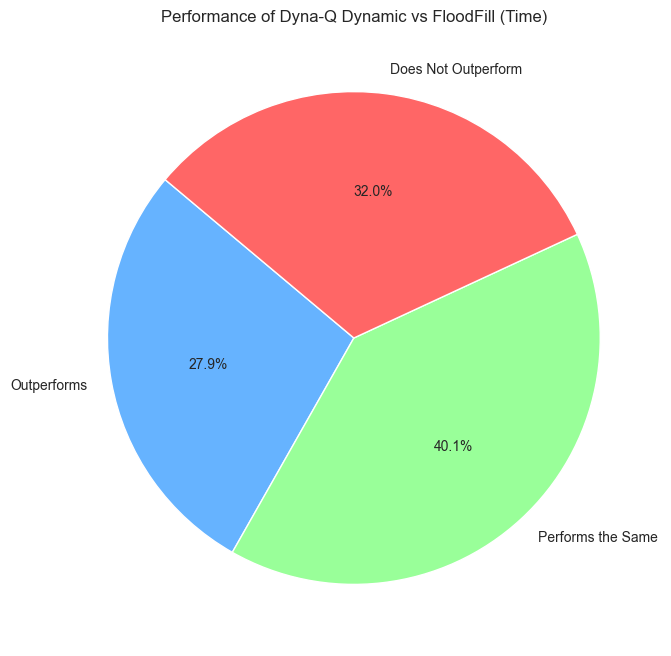

In [75]:
# Merge DataFrames on 'Maze Name'
df_combined = pd.merge(df_flood_fill_time[['Maze Name', 'Path Time (s)']], 
                       df_dynaq_sarsa_time[['Maze Name', 'Path Time (s)']], 
                       on='Maze Name', 
                       suffixes=('_flood_fill', '_dyna_qsarsa_time'))

df_combined = pd.merge(df_combined, df_dyna_qlearning_time[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'Path Time (s)_dyna_qlearning_time'}), 
                       on = 'Maze Name')

# Initialize counters
outperform = 0
same = 0
not_outperform = 0

# Compare path times
for _, row in df_combined.iterrows():
    if row['Path Time (s)_dyna_qlearning_time'] < row['Path Time (s)_flood_fill'] or row['Path Time (s)_dyna_qsarsa_time'] < row['Path Time (s)_flood_fill']:
        outperform += 1
    elif row['Path Time (s)_dyna_qlearning_time'] == row['Path Time (s)_flood_fill'] or row['Path Time (s)_dyna_qsarsa_time'] == row['Path Time (s)_flood_fill']:
        same += 1
    else:
        not_outperform += 1

# Calculate percentages
total = len(df_combined)
outperform_percent = (outperform / total) * 100
same_percent = (same / total) * 100
not_outperform_percent = (not_outperform / total) * 100

# Data for pie chart
labels = ['Outperforms', 'Performs the Same', 'Does Not Outperform']
sizes = [outperform_percent, same_percent, not_outperform_percent]
colors = ['#66b3ff','#99ff99','#ff6666']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Performance of Dyna-Q Dynamic vs FloodFill (Time)')
plt.show()

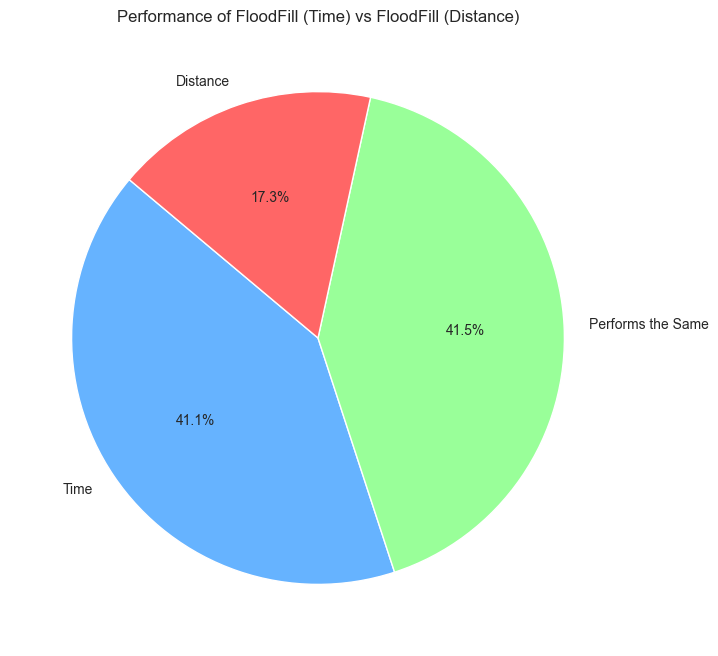

In [76]:
# Merge DataFrames on 'Maze Name'
df_combined = pd.merge(df_flood_fill[['Maze Name', 'Path Time (s)']], 
                       df_flood_fill_time[['Maze Name', 'Path Time (s)']], 
                       on='Maze Name', 
                       suffixes=('_flood_fill', '_dyna_qlearning_time'))

# df_combined = pd.merge(df_combined, df_dyna_qlearning_time[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'Path Time (s)_dyna_qlearning_time'}), 
#                        on = 'Maze Name')

# Initialize counters
outperform = 0
same = 0
not_outperform = 0

# Compare path times
for _, row in df_combined.iterrows():
    if row['Path Time (s)_dyna_qlearning_time'] < row['Path Time (s)_flood_fill'] :
        outperform += 1
    elif row['Path Time (s)_dyna_qlearning_time'] == row['Path Time (s)_flood_fill']:
        same += 1
    else:
        not_outperform += 1

# Calculate percentages
total = len(df_combined)
outperform_percent = (outperform / total) * 100
same_percent = (same / total) * 100
not_outperform_percent = (not_outperform / total) * 100

# Data for pie chart
labels = ['Time', 'Performs the Same', 'Distance']
sizes = [outperform_percent, same_percent, not_outperform_percent]
colors = ['#66b3ff','#99ff99','#ff6666']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Performance of FloodFill (Time) vs FloodFill (Distance)')
plt.savefig('results/figures/results-section/pie-charts/FloodFill-time-v-distance.pdf', format='pdf')

plt.show()

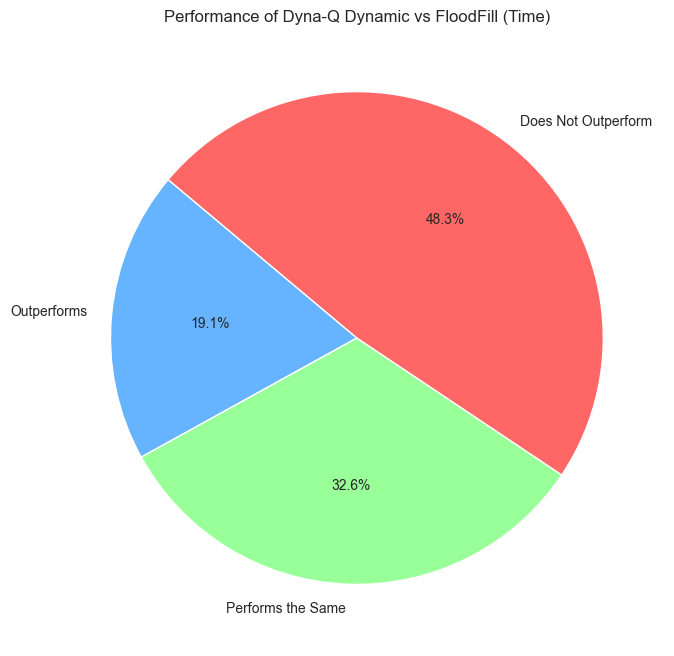

In [77]:
# Merge DataFrames on 'Maze Name'
df_combined = pd.merge(df_flood_fill_time[['Maze Name', 'Path Time (s)']], 
                       df_dynaq_sarsa_time[['Maze Name', 'Path Time (s)']], 
                       on='Maze Name', 
                       suffixes=('_flood_fill', '_dyna_qlearning_time'))

# df_combined = pd.merge(df_combined, df_dyna_qlearning_time[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'Path Time (s)_dyna_qlearning_time'}), 
#                        on = 'Maze Name')

# Initialize counters
outperform = 0
same = 0
not_outperform = 0

# Compare path times
for _, row in df_combined.iterrows():
    if row['Path Time (s)_dyna_qlearning_time'] < row['Path Time (s)_flood_fill'] :
        outperform += 1
    elif row['Path Time (s)_dyna_qlearning_time'] == row['Path Time (s)_flood_fill']:
        same += 1
    else:
        not_outperform += 1

# Calculate percentages
total = len(df_combined)
outperform_percent = (outperform / total) * 100
same_percent = (same / total) * 100
not_outperform_percent = (not_outperform / total) * 100

# Data for pie chart
labels = ['Outperforms', 'Performs the Same', 'Does Not Outperform']
sizes = [outperform_percent, same_percent, not_outperform_percent]
colors = ['#66b3ff','#99ff99','#ff6666']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Performance of Dyna-Q Dynamic vs FloodFill (Time)')
plt.show()

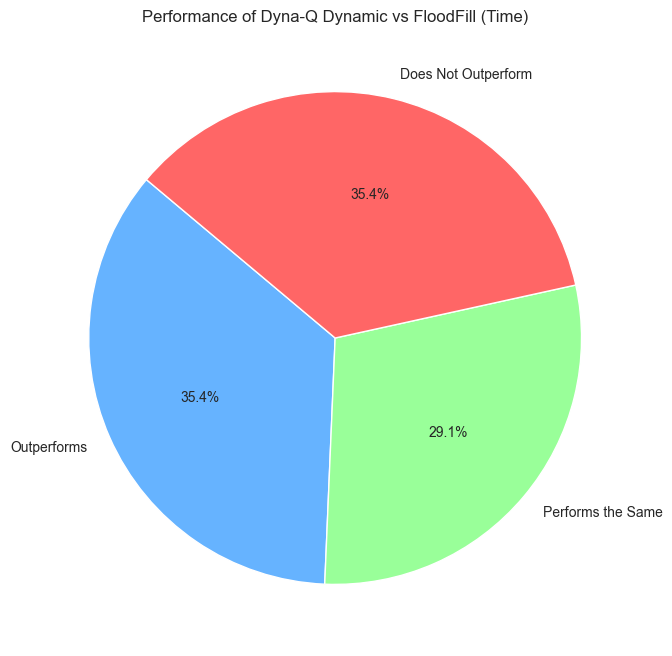

In [78]:
# Merge DataFrames on 'Maze Name'
df_combined = pd.merge(df_dynaq_sarsa_time[['Maze Name', 'Path Time (s)']], 
                       df_dyna_qlearning_time[['Maze Name', 'Path Time (s)']], 
                       on='Maze Name', 
                       suffixes=('_flood_fill', '_dyna_qlearning_time'))

# df_combined = pd.merge(df_combined, df_dyna_qlearning_time[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'Path Time (s)_dyna_qlearning_time'}), 
#                        on = 'Maze Name')

# Initialize counters
outperform = 0
same = 0
not_outperform = 0

# Compare path times
for _, row in df_combined.iterrows():
    if row['Path Time (s)_dyna_qlearning_time'] < row['Path Time (s)_flood_fill'] :
        outperform += 1
    elif row['Path Time (s)_dyna_qlearning_time'] == row['Path Time (s)_flood_fill']:
        same += 1
    else:
        not_outperform += 1

# Calculate percentages
total = len(df_combined)
outperform_percent = (outperform / total) * 100
same_percent = (same / total) * 100
not_outperform_percent = (not_outperform / total) * 100

# Data for pie chart
labels = ['Outperforms', 'Performs the Same', 'Does Not Outperform']
sizes = [outperform_percent, same_percent, not_outperform_percent]
colors = ['#66b3ff','#99ff99','#ff6666']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Performance of Dyna-Q Dynamic vs FloodFill (Time)')
plt.show()

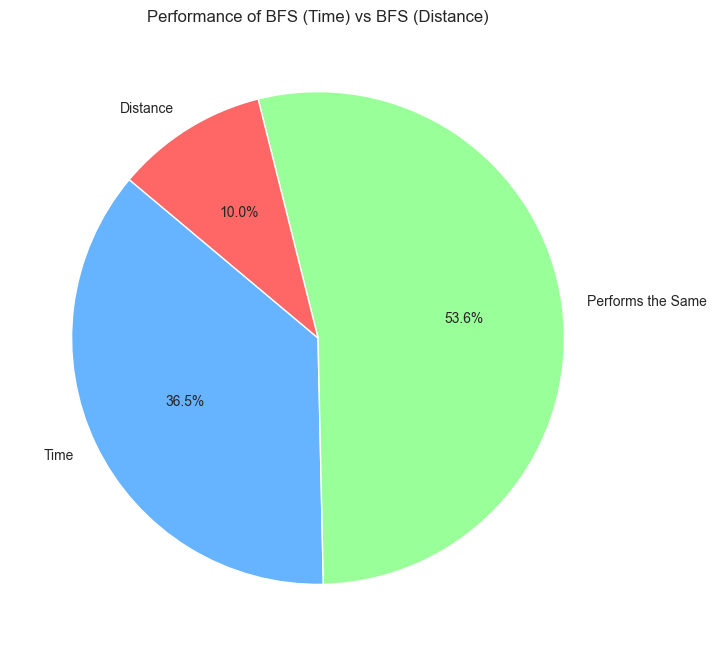

In [79]:
# Merge DataFrames on 'Maze Name'
df_combined = pd.merge(df_bfs[['Maze Name', 'Path Time (s)']], 
                       df_bfs_time[['Maze Name', 'Path Time (s)']], 
                       on='Maze Name', 
                       suffixes=('_flood_fill', '_dyna_qlearning_time'))

# df_combined = pd.merge(df_combined, df_dyna_qlearning_time[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'Path Time (s)_dyna_qlearning_time'}), 
#                        on = 'Maze Name')

# Initialize counters
outperform = 0
same = 0
not_outperform = 0

# Compare path times
for _, row in df_combined.iterrows():
    if row['Path Time (s)_dyna_qlearning_time'] < row['Path Time (s)_flood_fill'] :
        outperform += 1
    elif row['Path Time (s)_dyna_qlearning_time'] == row['Path Time (s)_flood_fill']:
        same += 1
    else:
        not_outperform += 1

# Calculate percentages
total = len(df_combined)
outperform_percent = (outperform / total) * 100
same_percent = (same / total) * 100
not_outperform_percent = (not_outperform / total) * 100

# Data for pie chart
labels = ['Time', 'Performs the Same', 'Distance']
sizes = [outperform_percent, same_percent, not_outperform_percent]
colors = ['#66b3ff','#99ff99','#ff6666']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Performance of BFS (Time) vs BFS (Distance)')
plt.savefig('results/figures/results-section/pie-charts/BFS-time-v-distance.pdf', format='pdf')

plt.show()

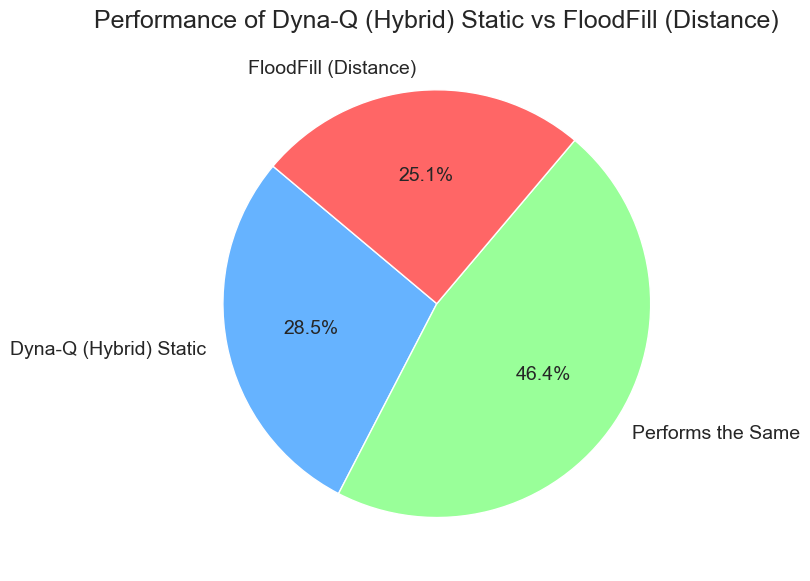

In [80]:
# Merge DataFrames on 'Maze Name'
df_combined = pd.merge(df_flood_fill[['Maze Name', 'Path Time (s)']], 
                       df_dynaq_sarsa_arbt[['Maze Name', 'Path Time (s)']], 
                       on='Maze Name', 
                       suffixes=('_ref', '_other'))

# df_combined = pd.merge(df_combined, df_dyna_qlearning_time[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'Path Time (s)_dyna_qlearning_time'}), 
#                        on = 'Maze Name')

# Initialize counters
outperform = 0
same = 0
not_outperform = 0

# Compare path times
for _, row in df_combined.iterrows():
    if row['Path Time (s)_other'] < row['Path Time (s)_ref'] :
        outperform += 1
    elif row['Path Time (s)_other'] == row['Path Time (s)_ref']:
        same += 1
    else:
        not_outperform += 1

# Calculate percentages
total = len(df_combined)
outperform_percent = (outperform / total) * 100
same_percent = (same / total) * 100
not_outperform_percent = (not_outperform / total) * 100

# Data for pie chart
labels = ['Dyna-Q (Hybrid) Static', 'Performs the Same', 'FloodFill (Distance)']
sizes = [outperform_percent, same_percent, not_outperform_percent]
colors = ['#66b3ff','#99ff99','#ff6666']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 14})
plt.title('Performance of Dyna-Q (Hybrid) Static vs FloodFill (Distance)', fontsize=18)
plt.tight_layout()
plt.savefig('results/figures/results-section/pie-charts/dyna-hybrid-static-floodfill-distance.pdf', format='pdf')

plt.show()

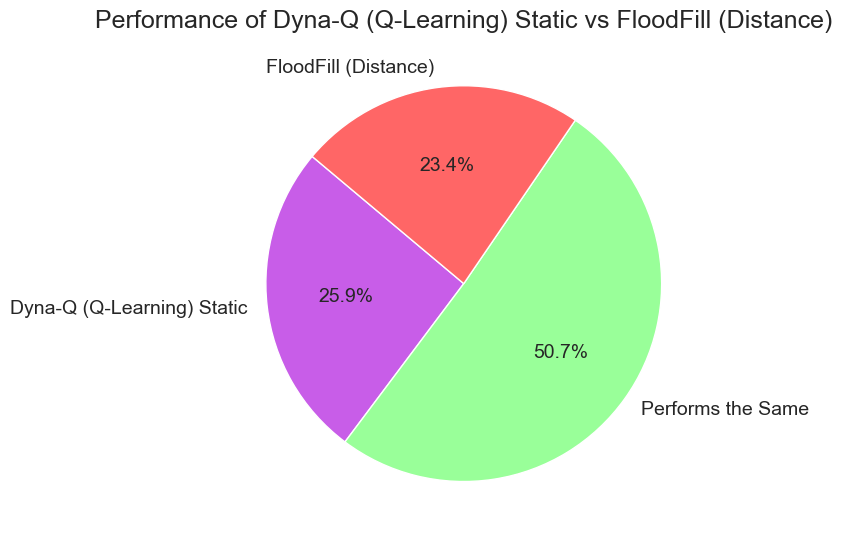

In [81]:
# Merge DataFrames on 'Maze Name'
df_combined = pd.merge(df_flood_fill[['Maze Name', 'Path Time (s)']], 
                       df_dyna_qlearning_arbt[['Maze Name', 'Path Time (s)']], 
                       on='Maze Name', 
                       suffixes=('_ref', '_other'))

# df_combined = pd.merge(df_combined, df_dyna_qlearning_time[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'Path Time (s)_dyna_qlearning_time'}), 
#                        on = 'Maze Name')

# Initialize counters
outperform = 0
same = 0
not_outperform = 0

# Compare path times
for _, row in df_combined.iterrows():
    if row['Path Time (s)_other'] < row['Path Time (s)_ref'] :
        outperform += 1
    elif row['Path Time (s)_other'] == row['Path Time (s)_ref']:
        same += 1
    else:
        not_outperform += 1

# Calculate percentages
total = len(df_combined)
outperform_percent = (outperform / total) * 100
same_percent = (same / total) * 100
not_outperform_percent = (not_outperform / total) * 100

# Data for pie chart
labels = ['Dyna-Q (Q-Learning) Static', 'Performs the Same', 'FloodFill (Distance)']
sizes = [outperform_percent, same_percent, not_outperform_percent]
colors = ['#c85de8','#99ff99','#ff6666']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 14})
plt.title('Performance of Dyna-Q (Q-Learning) Static vs FloodFill (Distance)', fontsize=18)
plt.tight_layout()
plt.savefig('results/figures/results-section/pie-charts/dyna-qlearning-static-floodfill-distance.pdf', format='pdf')

plt.show()

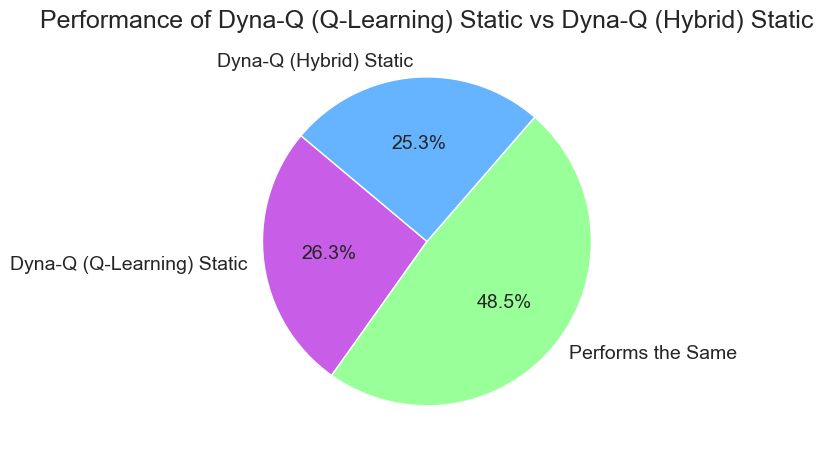

In [82]:
# Merge DataFrames on 'Maze Name'
df_combined = pd.merge(df_dynaq_sarsa_arbt[['Maze Name', 'Path Time (s)']], 
                       df_dyna_qlearning_arbt[['Maze Name', 'Path Time (s)']], 
                       on='Maze Name', 
                       suffixes=('_ref', '_other'))

# df_combined = pd.merge(df_combined, df_dyna_qlearning_time[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'Path Time (s)_dyna_qlearning_time'}), 
#                        on = 'Maze Name')

# Initialize counters
outperform = 0
same = 0
not_outperform = 0

# Compare path times
for _, row in df_combined.iterrows():
    if row['Path Time (s)_other'] < row['Path Time (s)_ref'] :
        outperform += 1
    elif row['Path Time (s)_other'] == row['Path Time (s)_ref']:
        same += 1
    else:
        not_outperform += 1

# Calculate percentages
total = len(df_combined)
outperform_percent = (outperform / total) * 100
same_percent = (same / total) * 100
not_outperform_percent = (not_outperform / total) * 100

# Data for pie chart
labels = ['Dyna-Q (Q-Learning) Static', 'Performs the Same', 'Dyna-Q (Hybrid) Static']
sizes = [outperform_percent, same_percent, not_outperform_percent]
colors = ['#c85de8','#99ff99','#66b3ff']

# Plot pie chart
plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 14})
plt.title('Performance of Dyna-Q (Q-Learning) Static vs Dyna-Q (Hybrid) Static', fontsize=18)
plt.tight_layout()
plt.savefig('results/figures/results-section/pie-charts/dyna-qlearning-static-dyna-hybrid-static.pdf', format='pdf', bbox_inches='tight')

plt.show()

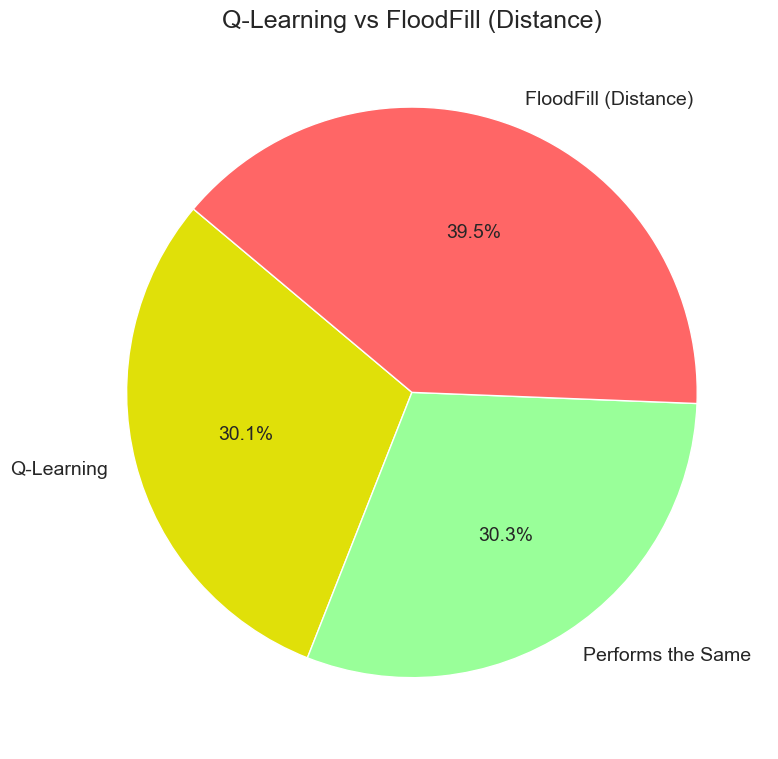

In [83]:
# Merge DataFrames on 'Maze Name'
df_combined = pd.merge(df_flood_fill[['Maze Name', 'Path Time (s)']], 
                       df_qlearning[['Maze Name', 'Path Time (s)']], 
                       on='Maze Name', 
                       suffixes=('_ref', '_other'))

# df_combined = pd.merge(df_combined, df_dyna_qlearning_time[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'Path Time (s)_dyna_qlearning_time'}), 
#                        on = 'Maze Name')

# Initialize counters
outperform = 0
same = 0
not_outperform = 0

# Compare path times
for _, row in df_combined.iterrows():
    if row['Path Time (s)_other'] < row['Path Time (s)_ref'] :
        outperform += 1
    elif row['Path Time (s)_other'] == row['Path Time (s)_ref']:
        same += 1
    else:
        not_outperform += 1

# Calculate percentages
total = len(df_combined)
outperform_percent = (outperform / total) * 100
same_percent = (same / total) * 100
not_outperform_percent = (not_outperform / total) * 100

# Data for pie chart
labels = ['Q-Learning', 'Performs the Same', 'FloodFill (Distance)']
sizes = [outperform_percent, same_percent, not_outperform_percent]
colors = ['#e0e009','#99ff99','#ff6666']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 14})
plt.title('Q-Learning vs FloodFill (Distance)', fontsize=18)
plt.tight_layout()
plt.savefig('results/figures/results-section/pie-charts/qlearning-floodfill-distance.pdf', format='pdf')

plt.show()

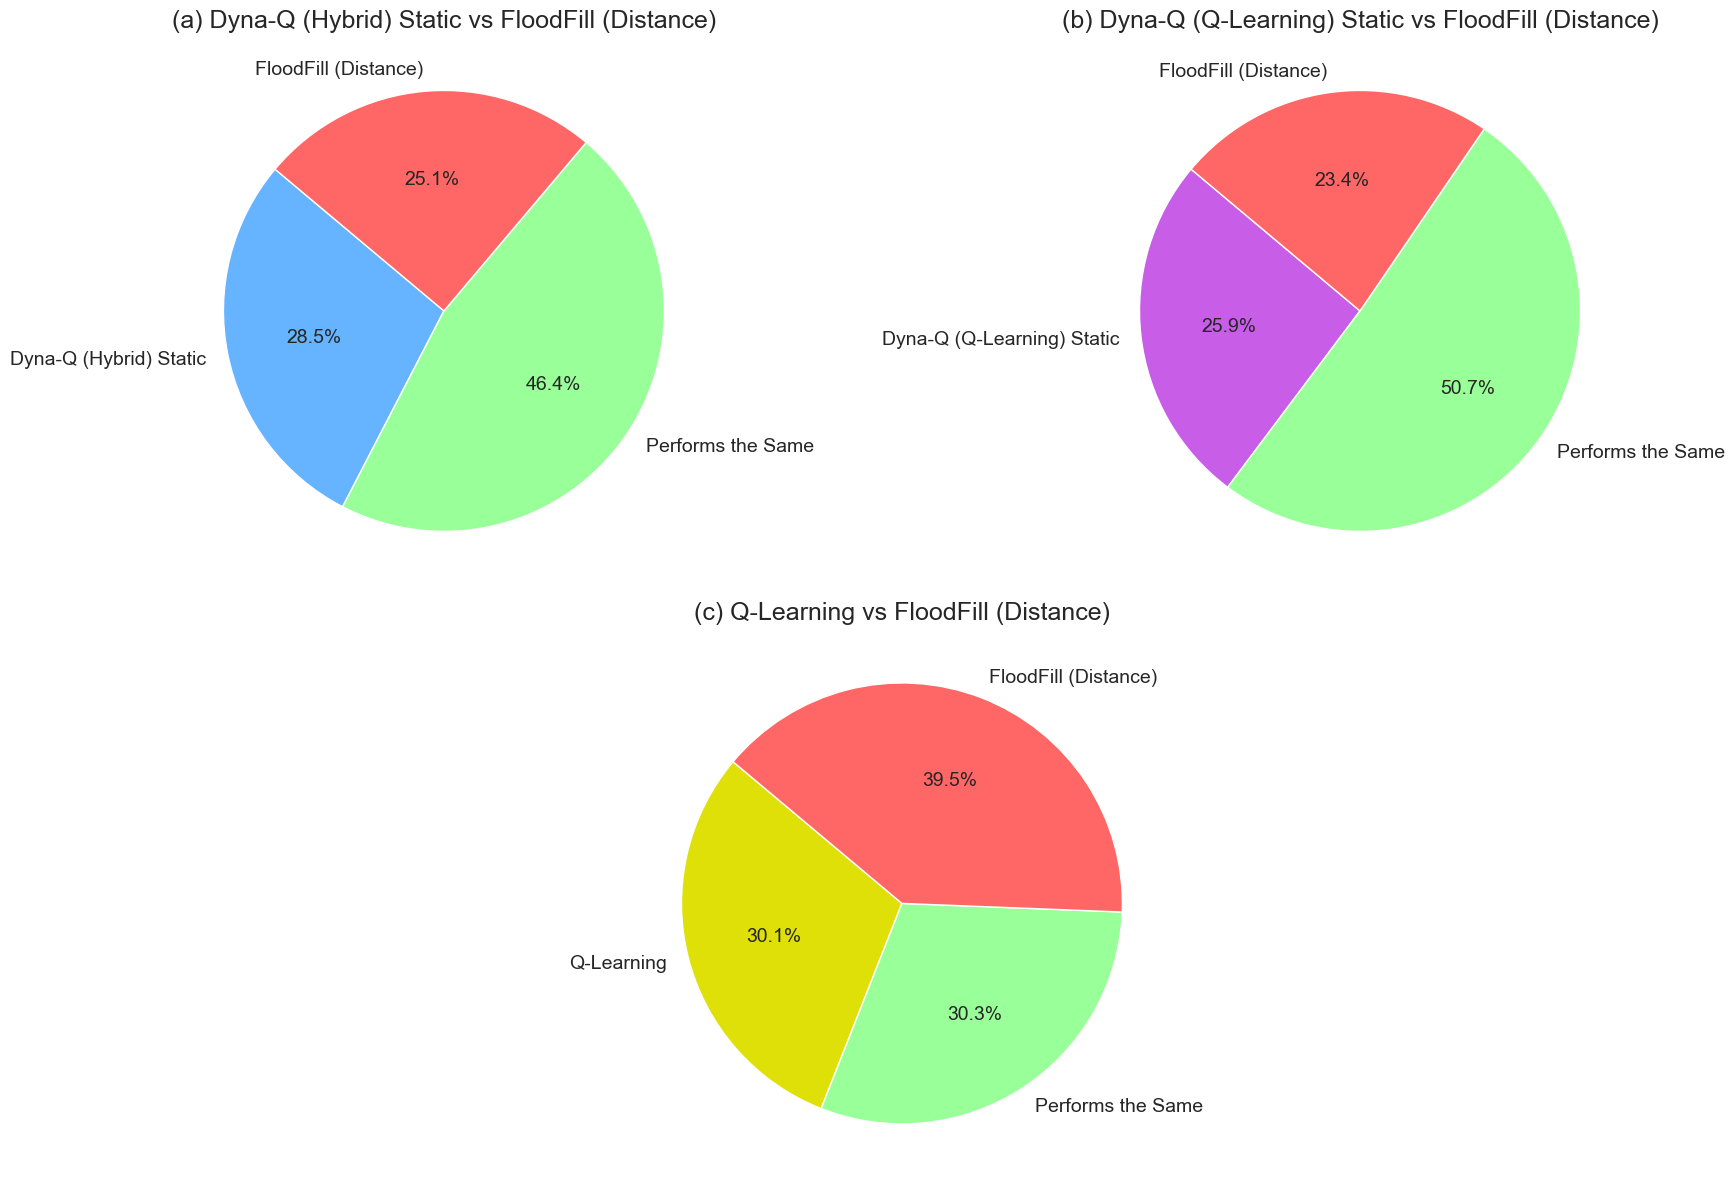

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data and configurations for each pie chart
pie_charts = [
    {
        'df_ref': df_flood_fill,
        'df_other': df_dynaq_sarsa_arbt,
        'labels': ['Dyna-Q (Hybrid) Static', 'Performs the Same', 'FloodFill (Distance)'],
        'colors': ['#66b3ff', '#99ff99', '#ff6666'],
        'title': '(a) Dyna-Q (Hybrid) Static vs FloodFill (Distance)',
        'save_name': 'dyna-hybrid-static-floodfill-distance.pdf'
    },
    {
        'df_ref': df_flood_fill,
        'df_other': df_dyna_qlearning_arbt,
        'labels': ['Dyna-Q (Q-Learning) Static', 'Performs the Same', 'FloodFill (Distance)'],
        'colors': ['#c85de8', '#99ff99', '#ff6666'],
        'title': '(b) Dyna-Q (Q-Learning) Static vs FloodFill (Distance)',
        'save_name': 'dyna-qlearning-static-floodfill-distance.pdf'
    },
    {
        'df_ref': df_flood_fill,
        'df_other': df_qlearning,
        'labels': ['Q-Learning', 'Performs the Same', 'FloodFill (Distance)'],
        'colors': ['#e0e009', '#99ff99', '#ff6666'],
        'title': '(c) Q-Learning vs FloodFill (Distance)',
        'save_name': 'qlearning-floodfill-distance.pdf'
    }
]

# Create subplots with a grid of 2x2 (with the last subplot spanning both columns)
fig = plt.figure(figsize=(18, 12))
grid = fig.add_gridspec(2, 2)

# Define the positions for each subplot
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, :])

# List of axes for easier looping
axs = [ax1, ax2, ax3]

# Loop through the pie chart configurations and plot each in a subfigure
for i, config in enumerate(pie_charts):
    # Merge the data
    df_combined = pd.merge(config['df_ref'][['Maze Name', 'Path Time (s)']], 
                           config['df_other'][['Maze Name', 'Path Time (s)']], 
                           on='Maze Name', 
                           suffixes=('_ref', '_other'))

    # Initialize counters
    outperform = 0
    same = 0
    not_outperform = 0

    # Compare path times
    for _, row in df_combined.iterrows():
        if row['Path Time (s)_other'] < row['Path Time (s)_ref']:
            outperform += 1
        elif row['Path Time (s)_other'] == row['Path Time (s)_ref']:
            same += 1
        else:
            not_outperform += 1

    # Calculate percentages
    total = len(df_combined)
    outperform_percent = (outperform / total) * 100
    same_percent = (same / total) * 100
    not_outperform_percent = (not_outperform / total) * 100

    # Data for pie chart
    sizes = [outperform_percent, same_percent, not_outperform_percent]

    # Plot pie chart on the specified axis
    ax = axs[i]
    ax.pie(sizes, labels=config['labels'], autopct='%1.1f%%', colors=config['colors'], startangle=140, textprops={'fontsize': 14})
    ax.set_title(config['title'], fontsize=18)

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined figure
plt.savefig('results/figures/results-section/pie-charts/combined_pie_charts.pdf', format='pdf')

# Show the plot
plt.show()


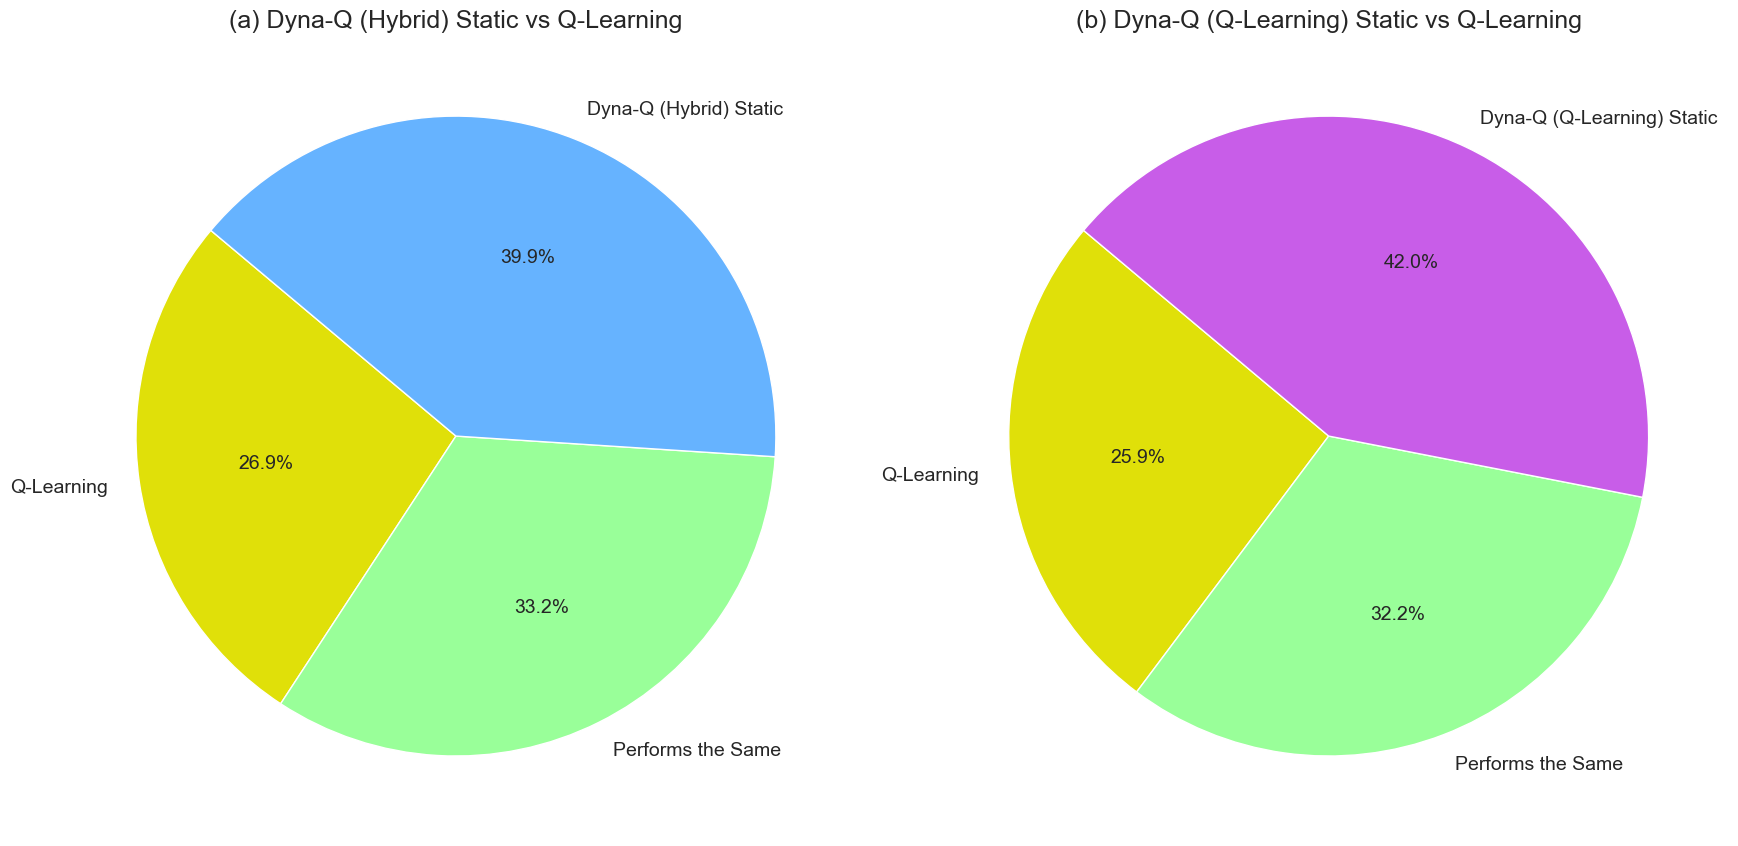

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data and configurations for each pie chart
pie_charts = [
    {
        'df_other': df_qlearning,
        'df_ref': df_dynaq_sarsa_arbt,
        'labels': ['Q-Learning', 'Performs the Same', 'Dyna-Q (Hybrid) Static'],
        'colors': ['#e0e009', '#99ff99',  '#66b3ff'],
        'title': '(a) Dyna-Q (Hybrid) Static vs Q-Learning',
        'save_name': 'dyna-hybrid-static-floodfill-distance.pdf'
    },
    {
        'df_other': df_qlearning,
        'df_ref': df_dyna_qlearning_arbt,
        'labels': ['Q-Learning', 'Performs the Same', 'Dyna-Q (Q-Learning) Static'],
        'colors': ['#e0e009', '#99ff99', '#c85de8'],
        'title': '(b) Dyna-Q (Q-Learning) Static vs Q-Learning',
        'save_name': 'dyna-qlearning-static-floodfill-distance.pdf'
    },
]

# Create subplots with a grid of 2x2 (with the last subplot spanning both columns)
fig = plt.figure(figsize=(18, 12))
grid = fig.add_gridspec(1, 2)

# Define the positions for each subplot
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
# List of axes for easier looping
axs = [ax1, ax2]

# Loop through the pie chart configurations and plot each in a subfigure
for i, config in enumerate(pie_charts):
    # Merge the data
    df_combined = pd.merge(config['df_ref'][['Maze Name', 'Path Time (s)']], 
                           config['df_other'][['Maze Name', 'Path Time (s)']], 
                           on='Maze Name', 
                           suffixes=('_ref', '_other'))

    # Initialize counters
    outperform = 0
    same = 0
    not_outperform = 0

    # Compare path times
    for _, row in df_combined.iterrows():
        if row['Path Time (s)_other'] < row['Path Time (s)_ref']:
            outperform += 1
        elif row['Path Time (s)_other'] == row['Path Time (s)_ref']:
            same += 1
        else:
            not_outperform += 1

    # Calculate percentages
    total = len(df_combined)
    outperform_percent = (outperform / total) * 100
    same_percent = (same / total) * 100
    not_outperform_percent = (not_outperform / total) * 100

    # Data for pie chart
    sizes = [outperform_percent, same_percent, not_outperform_percent]

    # Plot pie chart on the specified axis
    ax = axs[i]
    ax.pie(sizes, labels=config['labels'], autopct='%1.1f%%', colors=config['colors'], startangle=140, textprops={'fontsize': 14})
    ax.set_title(config['title'], fontsize=18)

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined figure
plt.savefig('results/figures/results-section/pie-charts/q-learning-vs-dyna.pdf', format='pdf')

# Show the plot
plt.show()


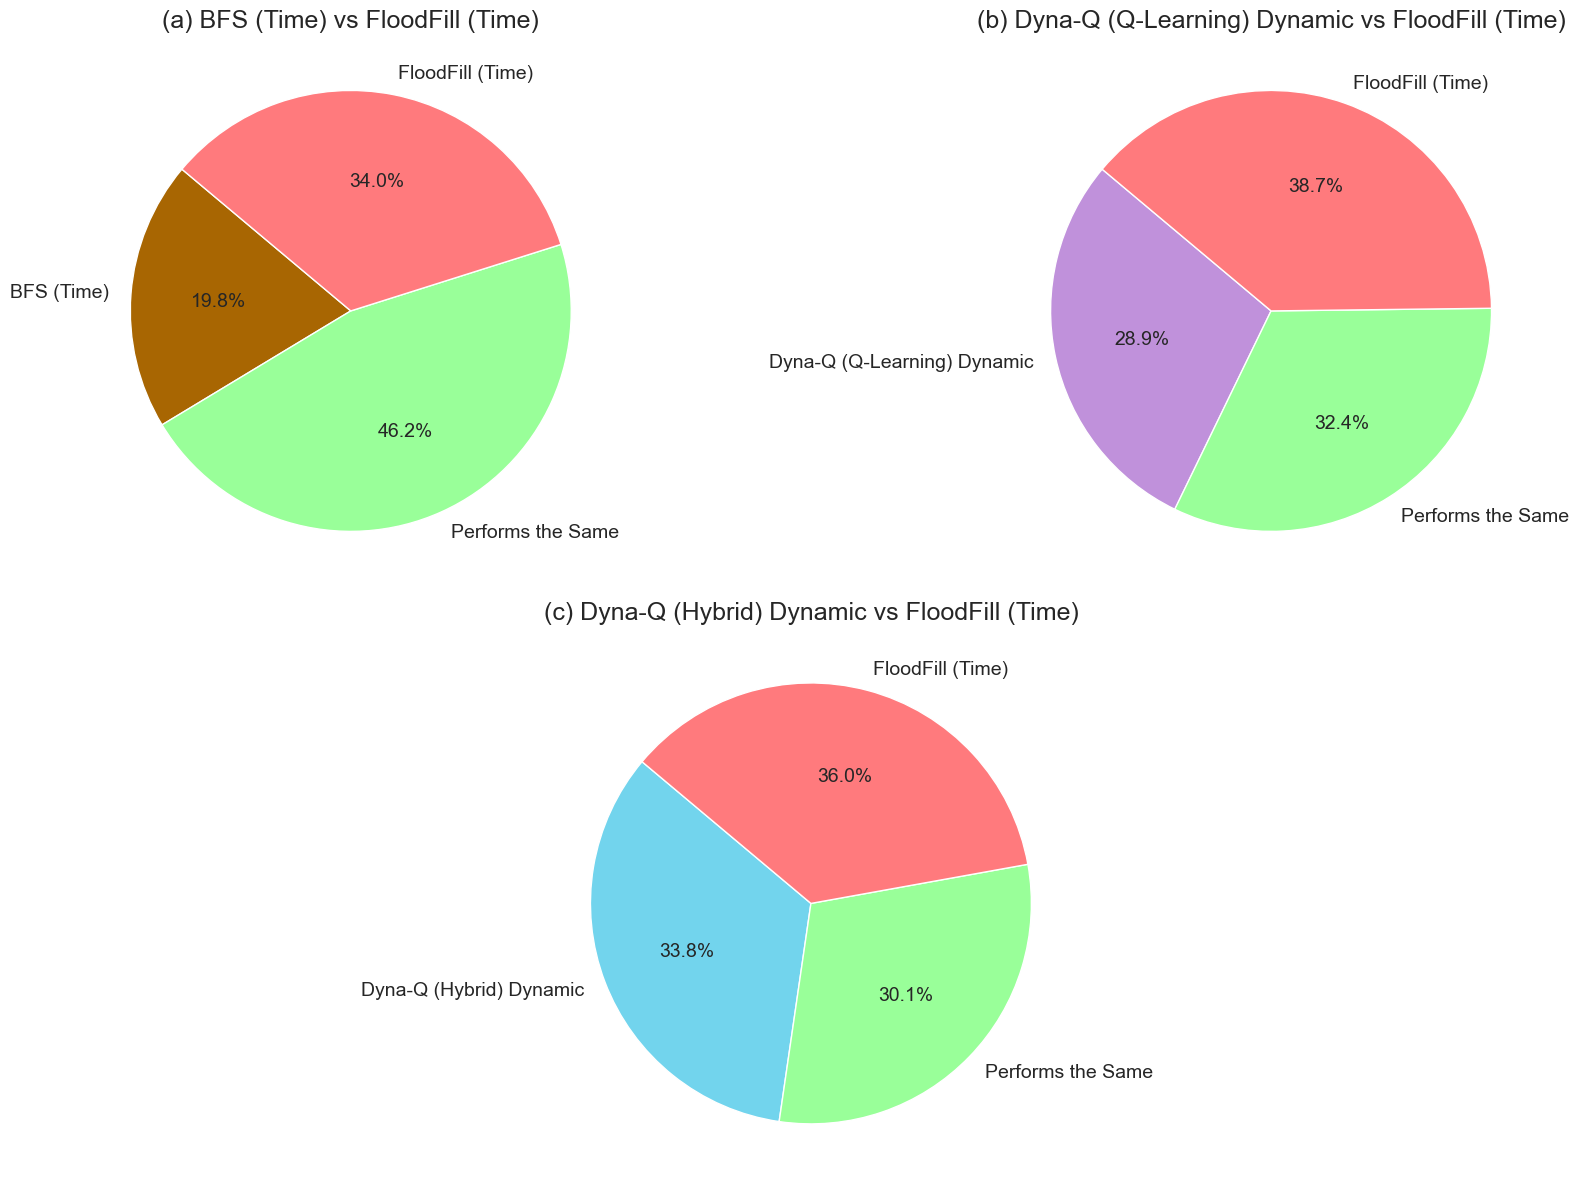

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data and configurations for each pie chart
pie_charts = [
    {
        'df_ref': df_flood_fill_time,
        'df_other': df_bfs_time,
        'labels': ['BFS (Time)', 'Performs the Same', 'FloodFill (Time)'],
        'colors': ['#a86602', '#99ff99', '#ff7a7d'],
        'title': '(a) BFS (Time) vs FloodFill (Time)',
        'save_name': 'bfs-floodfill-time-compare.pdf'
    },
    {
        'df_ref': df_flood_fill,
        'df_other': df_dyna_qlearning_time,
        'labels': ['Dyna-Q (Q-Learning) Dynamic', 'Performs the Same', 'FloodFill (Time)'],
        'colors': ['#c091db', '#99ff99', '#ff7a7d'],
        'title': '(b) Dyna-Q (Q-Learning) Dynamic vs FloodFill (Time)',
        'save_name': 'dyna-qlearning-static-floodfill-distance.pdf'
    },
    {
        'df_ref': df_flood_fill,
        'df_other': dynaq_sarsa_time,
        'labels': ['Dyna-Q (Hybrid) Dynamic', 'Performs the Same', 'FloodFill (Time)'],
        'colors': ['#72d4ed', '#99ff99', '#ff7a7d'],
        'title': '(c) Dyna-Q (Hybrid) Dynamic vs FloodFill (Time)',
        'save_name': 'dyna-hybrid-static-floodfill-distance.pdf'
    }
]

# Create subplots with a grid of 2x2 (with the last subplot spanning both columns)
fig = plt.figure(figsize=(18, 12))
grid = fig.add_gridspec(2, 2)

# Define the positions for each subplot
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, :])

# List of axes for easier looping
axs = [ax1, ax2, ax3]

# Loop through the pie chart configurations and plot each in a subfigure
for i, config in enumerate(pie_charts):
    # Merge the data
    df_combined = pd.merge(config['df_ref'][['Maze Name', 'Path Time (s)']], 
                           config['df_other'][['Maze Name', 'Path Time (s)']], 
                           on='Maze Name', 
                           suffixes=('_ref', '_other'))

    # Initialize counters
    outperform = 0
    same = 0
    not_outperform = 0

    # Compare path times
    for _, row in df_combined.iterrows():
        if row['Path Time (s)_other'] < row['Path Time (s)_ref']:
            outperform += 1
        elif row['Path Time (s)_other'] == row['Path Time (s)_ref']:
            same += 1
        else:
            not_outperform += 1

    # Calculate percentages
    total = len(df_combined)
    outperform_percent = (outperform / total) * 100
    same_percent = (same / total) * 100
    not_outperform_percent = (not_outperform / total) * 100

    # Data for pie chart
    sizes = [outperform_percent, same_percent, not_outperform_percent]

    # Plot pie chart on the specified axis
    ax = axs[i]
    ax.pie(sizes, labels=config['labels'], autopct='%1.1f%%', colors=config['colors'], startangle=140, textprops={'fontsize': 14})
    ax.set_title(config['title'], fontsize=18)

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined figure
plt.savefig('results/figures/results-section/pie-charts/combined_pie_charts_time.pdf', format='pdf')

# Show the plot
plt.show()


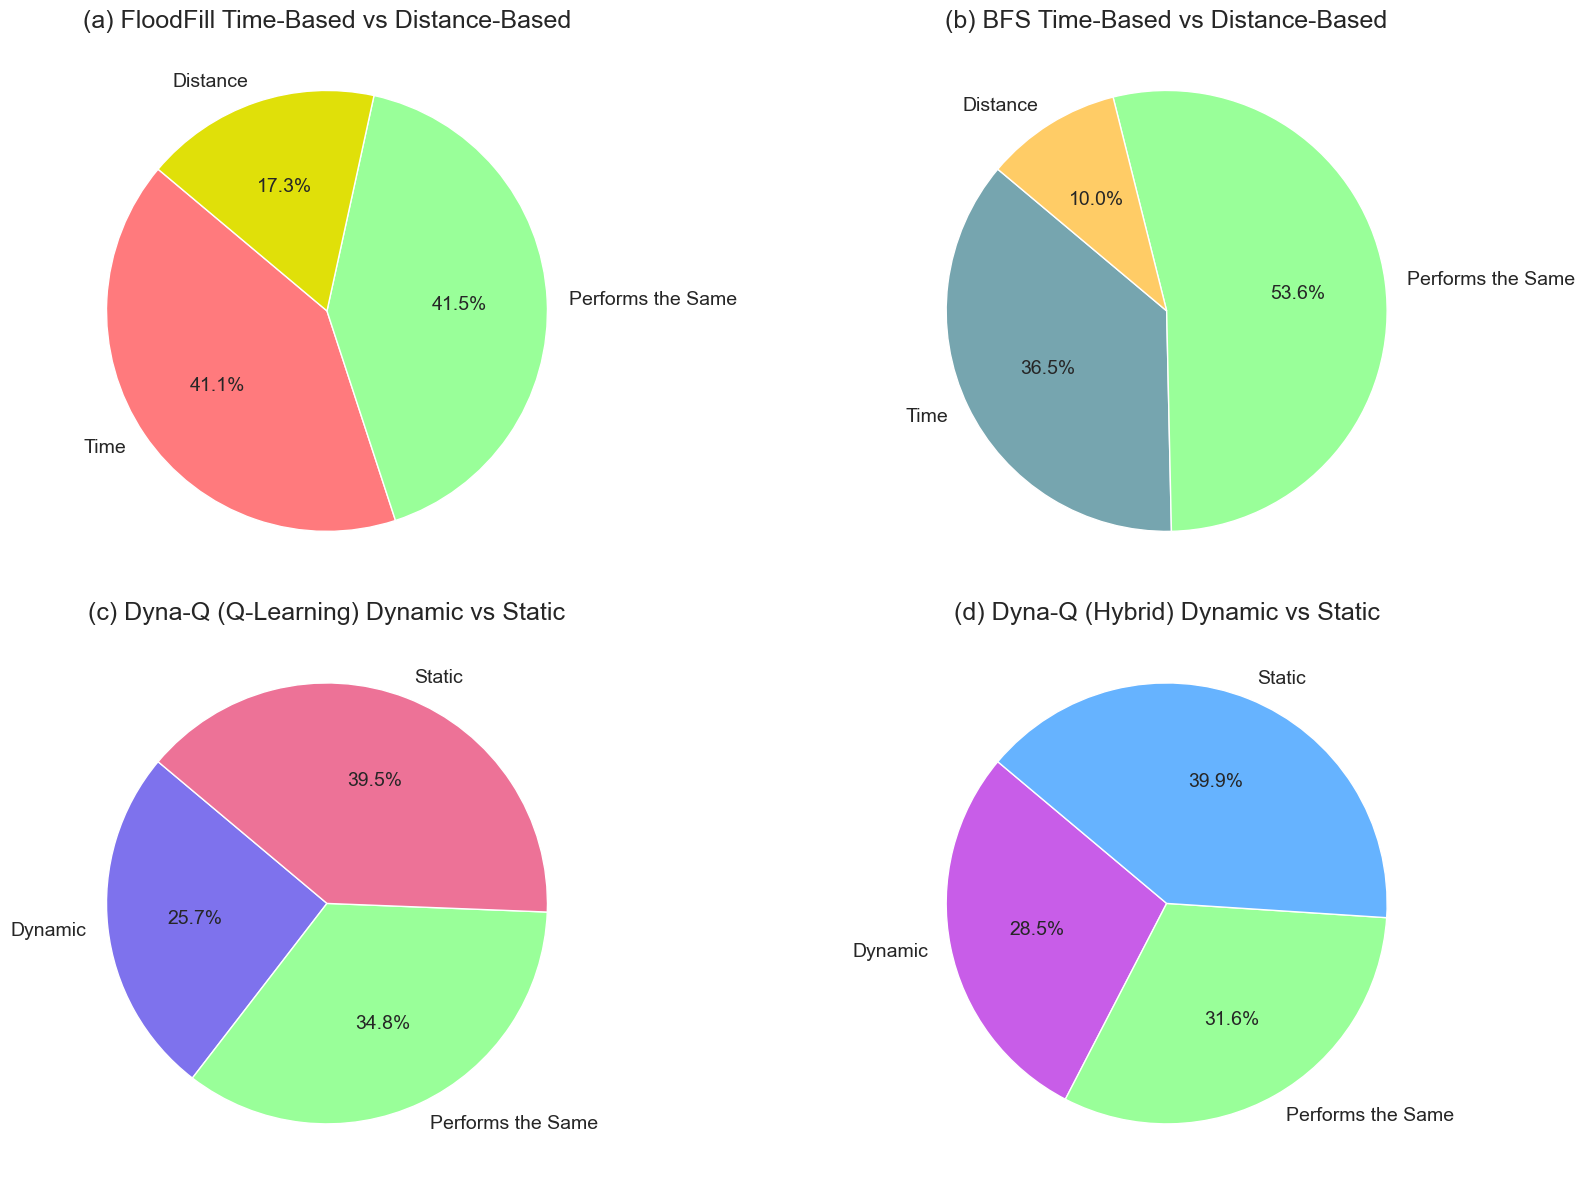

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data and configurations for each pie chart
pie_charts = [
    {
        'df_ref': df_flood_fill,
        'df_other': df_flood_fill_time,
        'labels': ['Time', 'Performs the Same', 'Distance'],
        'colors': ['#ff7a7d', '#99ff99', '#e0e009'],  # Keep these colors as is
        'title': '(a) FloodFill Time-Based vs Distance-Based',
        'save_name': 'flood-time-vs-distance.pdf'
    },
    {
        'df_ref': df_bfs,
        'df_other': df_bfs_time,
        'labels': ['Time', 'Performs the Same', 'Distance'],
        'colors': ['#76a5af', '#99ff99', '#ffcc66'],  # Keep these colors as is
        'title': '(b) BFS Time-Based vs Distance-Based',
        'save_name': 'bfs-time-vs-distance.pdf'
    },
    {
        'df_ref': df_dyna_qlearning_arbt,
        'df_other': df_dyna_qlearning_time,
        'labels': ['Dynamic', 'Performs the Same', 'Static'],
        'colors': ['#7e72ed', '#99ff99', '#ed7297'],  # Changed colors for this chart
        'title': '(c) Dyna-Q (Q-Learning) Dynamic vs Static',
        'save_name': 'dyna-qlearning-static-vs-dynamic.pdf'
    },
    {
        'df_ref': dynaq_sarsa_arbt,
        'df_other': dynaq_sarsa_time,
        'labels': ['Dynamic', 'Performs the Same', 'Static'],
        'colors': ['#c85de8', '#99ff99', '#66b3ff'],  # Keep these colors as is
        'title': '(d) Dyna-Q (Hybrid) Dynamic vs Static',
        'save_name': 'dyna-hybrid-static-vs-dynamic.pdf'
    }
]

# Create subplots with a grid of 2x2
fig = plt.figure(figsize=(18, 12))
grid = fig.add_gridspec(2, 2)

# Define the positions for each subplot
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, 0])
ax4 = fig.add_subplot(grid[1, 1])

# List of axes for easier looping
axs = [ax1, ax2, ax3, ax4]

# Loop through the pie chart configurations and plot each in a subfigure
for i, config in enumerate(pie_charts):
    # Merge the data
    df_combined = pd.merge(config['df_ref'][['Maze Name', 'Path Time (s)']], 
                           config['df_other'][['Maze Name', 'Path Time (s)']], 
                           on='Maze Name', 
                           suffixes=('_ref', '_other'))

    # Initialize counters
    outperform = 0
    same = 0
    not_outperform = 0

    # Compare path times
    for _, row in df_combined.iterrows():
        if row['Path Time (s)_other'] < row['Path Time (s)_ref']:
            outperform += 1
        elif row['Path Time (s)_other'] == row['Path Time (s)_ref']:
            same += 1
        else:
            not_outperform += 1

    # Calculate percentages
    total = len(df_combined)
    outperform_percent = (outperform / total) * 100
    same_percent = (same / total) * 100
    not_outperform_percent = (not_outperform / total) * 100

    # Data for pie chart
    sizes = [outperform_percent, same_percent, not_outperform_percent]

    # Plot pie chart on the specified axis
    ax = axs[i]
    ax.pie(sizes, labels=config['labels'], autopct='%1.1f%%', colors=config['colors'], startangle=140, textprops={'fontsize': 14})
    ax.set_title(config['title'], fontsize=18)

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined figure
plt.savefig('results/figures/results-section/pie-charts/combined_pie_charts_time_vs_dist.pdf', format='pdf')

# Show the plot
plt.show()


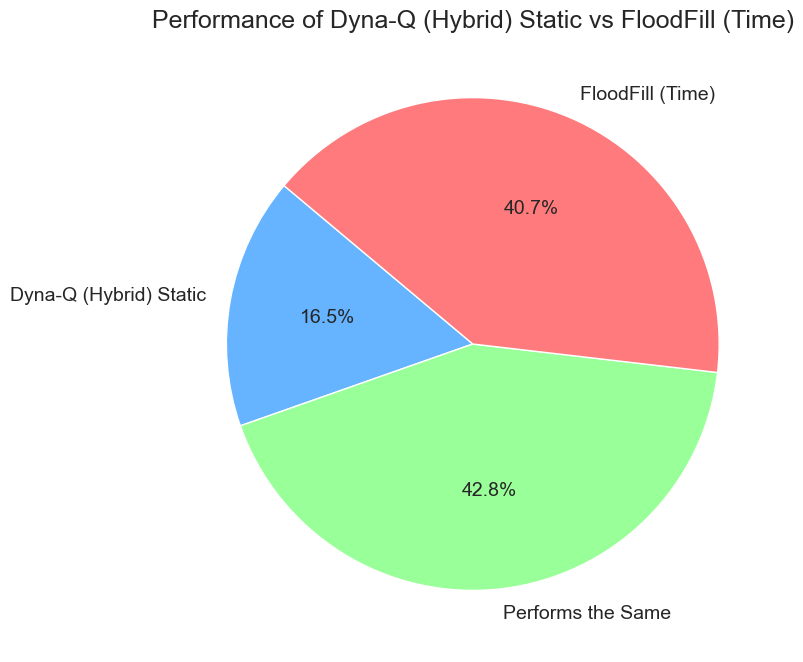

In [88]:
# Merge DataFrames on 'Maze Name'
df_combined = pd.merge(df_flood_fill_time[['Maze Name', 'Path Time (s)']], 
                       dynaq_sarsa_arbt[['Maze Name', 'Path Time (s)']], 
                       on='Maze Name', 
                       suffixes=('_ref', '_other'))

# df_combined = pd.merge(df_combined, df_dyna_qlearning_time[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'Path Time (s)_dyna_qlearning_time'}), 
#                        on = 'Maze Name')

# Initialize counters
outperform = 0
same = 0
not_outperform = 0

# Compare path times
for _, row in df_combined.iterrows():
    if row['Path Time (s)_other'] < row['Path Time (s)_ref'] :
        outperform += 1
    elif row['Path Time (s)_other'] == row['Path Time (s)_ref']:
        same += 1
    else:
        not_outperform += 1

# Calculate percentages
total = len(df_combined)
outperform_percent = (outperform / total) * 100
same_percent = (same / total) * 100
not_outperform_percent = (not_outperform / total) * 100

# Data for pie chart
labels = ['Dyna-Q (Hybrid) Static', 'Performs the Same', 'FloodFill (Time)']
sizes = [outperform_percent, same_percent, not_outperform_percent]
colors = ['#66b3ff','#99ff99','#ff7a7d']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 14})
plt.title('Performance of Dyna-Q (Hybrid) Static vs FloodFill (Time)', fontsize=18)
# plt.tight_layout()
plt.savefig('results/figures/results-section/pie-charts/dyna-hybrid-floodfill-time.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrames loaded, for example:

# List of DataFrames and corresponding labels for multi-agent path time calculation
algorithms = [
    ('df_flood_fill_time', df_flood_fill_time),
    ('df_bfs_time', df_bfs_time),
    # ('Dyna-Q Q-learning (Dynamic)', df_dyna_qlearning_time),
    ('df_dyna_hybrid_time', dynaq_sarsa_time),
]

# Combine all algorithm results to calculate the minimum path time
combined_df = pd.DataFrame()

for name, df in algorithms:
    if combined_df.empty:
        combined_df = df[['Maze Name', 'Path Time (s)']].copy()
        combined_df.rename(columns={'Path Time (s)': name}, inplace=True)
    else:
        combined_df = pd.merge(combined_df, df[['Maze Name', 'Path Time (s)']], on='Maze Name')
        combined_df.rename(columns={'Path Time (s)': name}, inplace=True)

# Calculate the minimum path time across all selected algorithms
combined_df['Min_Path_Time'] = combined_df.iloc[:, 1:].min(axis=1)

# Calculate the mean of these minimum path times
mean_path_time = combined_df['Min_Path_Time'].mean()

# Display the result
print(f"Mean Path Time using Multi-Agent Approach: {mean_path_time:.2f} seconds")


Mean Path Time using Multi-Agent Approach: 19.87 seconds


In [185]:
combined_df = combined_df[['Maze Name', 'Min_Path_Time']].rename(columns={'Min_Path_Time': 'Path Time (s)'})

In [186]:
dfs = [
    ('FloodFill (Distance)', df_flood_fill),
    ('BFS (Distance)', df_bfs),
    ('A*', df_astar),
    ('Dijkstra', df_dijkstra),
    ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('Dyna-Q Q-learning (Static)', df_dyna_qlearning_arbt),
    ('Dyna-Q Q-learning (Dynamic)', df_dyna_qlearning_time),
    ('Dyna-Q Hybrid (Static)', dynaq_sarsa_arbt),
]
combined_df_other = pd.DataFrame()
for name, df in dfs:
    if combined_df_other.empty:
        combined_df_other = df[['Maze Name', 'Path Time (s)']].copy()
        combined_df_other.rename(columns={'Path Time (s)': name}, inplace=True)
    else:
        combined_df_other = pd.merge(combined_df_other, df[['Maze Name', 'Path Time (s)']], on='Maze Name')
        combined_df_other.rename(columns={'Path Time (s)': name}, inplace=True)

In [187]:
combined_df_other['Path Time (s)'] = combined_df_other.iloc[:, 1:].min(axis=1)
mean_path_time = combined_df_other['Path Time (s)'].mean()

# Display the result
print(f"Mean Path Time using Multi-Agent Approach: {mean_path_time:.2f} seconds")

Mean Path Time using Multi-Agent Approach: 19.85 seconds


In [188]:
combined_df_other

,Maze Name,FloodFill (Distance),BFS (Distance),A*,Dijkstra,SARSA,Q-learning,Dyna-Q Q-learning (Static),Dyna-Q Q-learning (Dynamic),Dyna-Q Hybrid (Static),Path Time (s)
0,13ye,18.241782,19.481086,19.481086,19.481086,18.241782,19.481086,18.241782,18.241782,18.241782,18.241782
1,50,27.575872,27.575872,27.575872,27.575872,25.670533,25.670533,27.575872,27.575872,24.613396,24.613396
2,86,5.598013,5.598013,5.598013,5.598013,5.598013,5.598013,5.598013,5.948080,5.948080,5.598013
3,87sin,13.623074,14.794908,14.794908,14.794908,13.036416,13.623074,13.623074,13.036416,14.794908,13.036416
4,87us1,24.619658,24.619658,24.619658,24.619658,24.619658,30.818586,24.619658,24.619658,24.619658,24.619658
...,...,...,...,...,...,...,...,...,...,...,...
486,xx,9.109604,11.547772,11.547772,11.547772,9.109604,9.109604,9.762001,11.037284,9.762001,9.109604
487,yama2002,14.739266,14.739266,14.739266,14.739266,15.895805,16.072963,16.270821,17.604517,16.270821,14.739266
488,yama7,12.889292,12.889292,12.889292,12.889292,11.947489,12.889292,12.889292,14.100371,11.947489,11.947489
489,yama89,10.080208,11.259959,11.259959,11.259959,10.100664,11.733534,10.235953,10.235953,10.080208,10.080208


In [189]:
combined_df_other = combined_df_other[['Maze Name', 'Path Time (s)']]

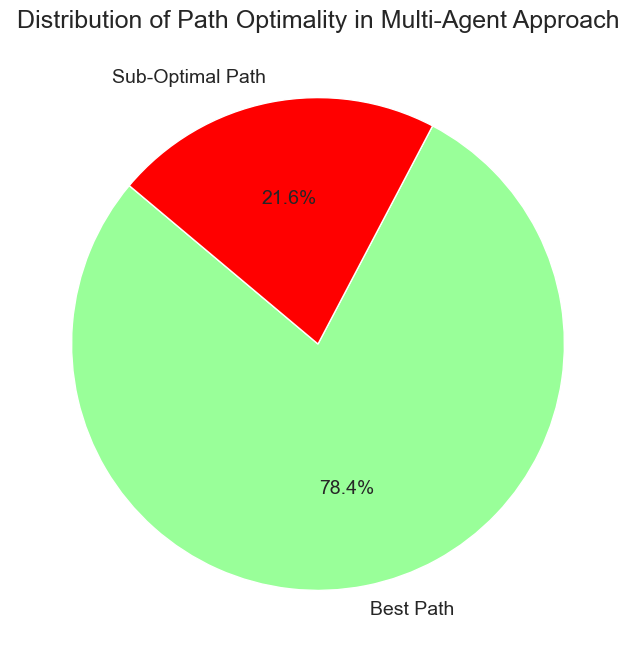

In [197]:
# Merge DataFrames on 'Maze Name'
df_combined = pd.merge(combined_df_other, 
                       combined_df,
                       on='Maze Name', 
                       suffixes=('_ref', '_other'))

# df_combined = pd.merge(df_combined, df_dyna_qlearning_time[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'Path Time (s)_dyna_qlearning_time'}), 
#                        on = 'Maze Name')

# Initialize counters
outperform = 0
# same = 0
not_outperform = 0

# Compare path times
for _, row in df_combined.iterrows():
    if row['Path Time (s)_other'] <= row['Path Time (s)_ref'] :
        outperform += 1

    else:
        not_outperform += 1

# Calculate percentages
total = len(df_combined)
outperform_percent = (outperform / total) * 100
# same_percent = (same / total) * 100
not_outperform_percent = (not_outperform / total) * 100

# Data for pie chart
labels = ['Best Path', 'Sub-Optimal Path']
sizes = [outperform_percent, not_outperform_percent]
colors = ['#99ff99','red']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 14})
plt.title('Distribution of Path Optimality in Multi-Agent Approach', fontsize=18)
# plt.tight_layout()
plt.savefig('results/figures/results-section/pie-charts/multi-agent-.pdf', format='pdf', bbox_inches='tight')

plt.show()

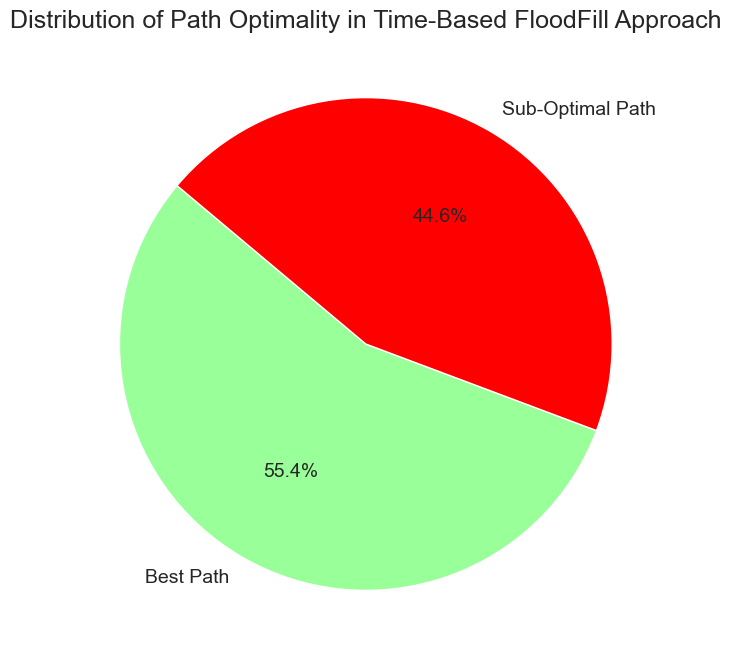

In [199]:
dfs = [
    ('FloodFill (Distance)', df_flood_fill),
    ('BFS (Distance)', df_bfs),
    ('A*', df_astar),
    ('Dijkstra', df_dijkstra),
    ('SARSA', df_sarsa),
    ('Q-learning', df_qlearning),
    ('Dyna-Q Q-learning (Static)', df_dyna_qlearning_arbt),
    ('Dyna-Q Q-learning (Dynamic)', df_dyna_qlearning_time),
    ('Dyna-Q Hybrid (Static)', dynaq_sarsa_arbt),
    ('df_bfs_time', df_bfs_time),
    ('df_dyna_hybrid_time', dynaq_sarsa_time),
]
combined_df_other = pd.DataFrame()
for name, df in dfs:
    if combined_df_other.empty:
        combined_df_other = df[['Maze Name', 'Path Time (s)']].copy()
        combined_df_other.rename(columns={'Path Time (s)': name}, inplace=True)
    else:
        combined_df_other = pd.merge(combined_df_other, df[['Maze Name', 'Path Time (s)']], on='Maze Name')
        combined_df_other.rename(columns={'Path Time (s)': name}, inplace=True)
combined_df_other['Path Time (s)'] = combined_df_other.iloc[:, 1:].min(axis=1)
mean_path_time = combined_df_other['Path Time (s)'].mean()

# Display the result
combined_df_other = combined_df_other[['Maze Name', 'Path Time (s)']]



# Merge DataFrames on 'Maze Name'
df_combined = pd.merge(combined_df_other, 
                       df_flood_fill_time,
                       on='Maze Name', 
                       suffixes=('_ref', '_other'))

# df_combined = pd.merge(df_combined, df_dyna_qlearning_time[['Maze Name', 'Path Time (s)']].rename(columns={'Path Time (s)': 'Path Time (s)_dyna_qlearning_time'}), 
#                        on = 'Maze Name')

# Initialize counters
outperform = 0
# same = 0
not_outperform = 0

# Compare path times
for _, row in df_combined.iterrows():
    if row['Path Time (s)_other'] <= row['Path Time (s)_ref'] :
        outperform += 1

    else:
        not_outperform += 1

# Calculate percentages
total = len(df_combined)
outperform_percent = (outperform / total) * 100
# same_percent = (same / total) * 100
not_outperform_percent = (not_outperform / total) * 100

# Data for pie chart
labels = ['Best Path', 'Sub-Optimal Path']
sizes = [outperform_percent, not_outperform_percent]
colors = ['#99ff99','red']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 14})
plt.title('Distribution of Path Optimality in Time-Based FloodFill Approach', fontsize=18)
# plt.tight_layout()
plt.savefig('results/figures/results-section/pie-charts/flood-path-optimality.pdf', format='pdf', bbox_inches='tight')

plt.show()